# EXPOLARATORY ANALYSIS
In this jupyter notebook we will expolore the dataset obtained. In particular we'll focus on: 
1. **Seasonal plot**: basic plotting, year-wise box plot for trend, month_wise box plot for seasonality,
2. **A few metrics**:  average daily yearly and quaterly, mean and std, median close price and 10th percentile and 90th percentile
3. **Correlation and autocorrelation on PCT change**
4. **Test for random walk by applying regression model**

## 1- Data preparation

We first import all the libraries we'll need and then we fix the plotting stile 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf
import pickle

# For statistical analysis
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Configure plotting style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

We take the data from the pickle create in the getdata.py file. We already know from the mentioned file that there are no missin values.

We also proceed by taking a quick look at the dataframe.

In [2]:
# Take data
with open('sp500_data_original.pkl', 'rb') as f:
    sp500_data = pickle.load(f)

# Quick overview
sp500_data.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
0,1927-12-30 00:00:00+00:00,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03 00:00:00+00:00,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04 00:00:00+00:00,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05 00:00:00+00:00,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06 00:00:00+00:00,17.660000,17.660000,17.660000,17.660000,17.660000,0


We can easily see that our datas start in 1927, which is way too old and useless for our analysis.

So we prooced by :

1. Create new time like columns

2. Flatten the MultiIndex columns 

3. Create two new dataframes, one from 2014-2024 and one from 2004-2013

In [3]:
# 1- Create time like columns
sp500_data['Year'] = sp500_data['Date'].dt.year
sp500_data['Month'] = sp500_data['Date'].dt.month
sp500_data['Day'] = sp500_data['Date'].dt.day
sp500_data['Weekday'] = sp500_data['Date'].dt.day_name()
sp500_data['Quarter'] = sp500_data['Date'].dt.quarter

# 2-
# Set the 'Date' column as index
sp500_data.set_index(('Date', ''), inplace=True)

# Flatten the MultiIndex columns
sp500_data.columns = ['_'.join(col).strip() for col in sp500_data.columns.values]

# 3- Due to the large number of years, we'll focus on the last 10 years
recent_years = sp500_data[sp500_data['Year_'] >= sp500_data['Year_'].max() - 10]
oldest_years = sp500_data[(sp500_data['Year_'] < sp500_data['Year_'].max() - 10) & (sp500_data['Year_'] >= sp500_data['Year_'].max() - 20)]

## 2-Seasonal Plot: Year-wise Box Plot for Trend

We'll create a box plot of the S&P 500 'Close' price for each year to observe the trend over time.

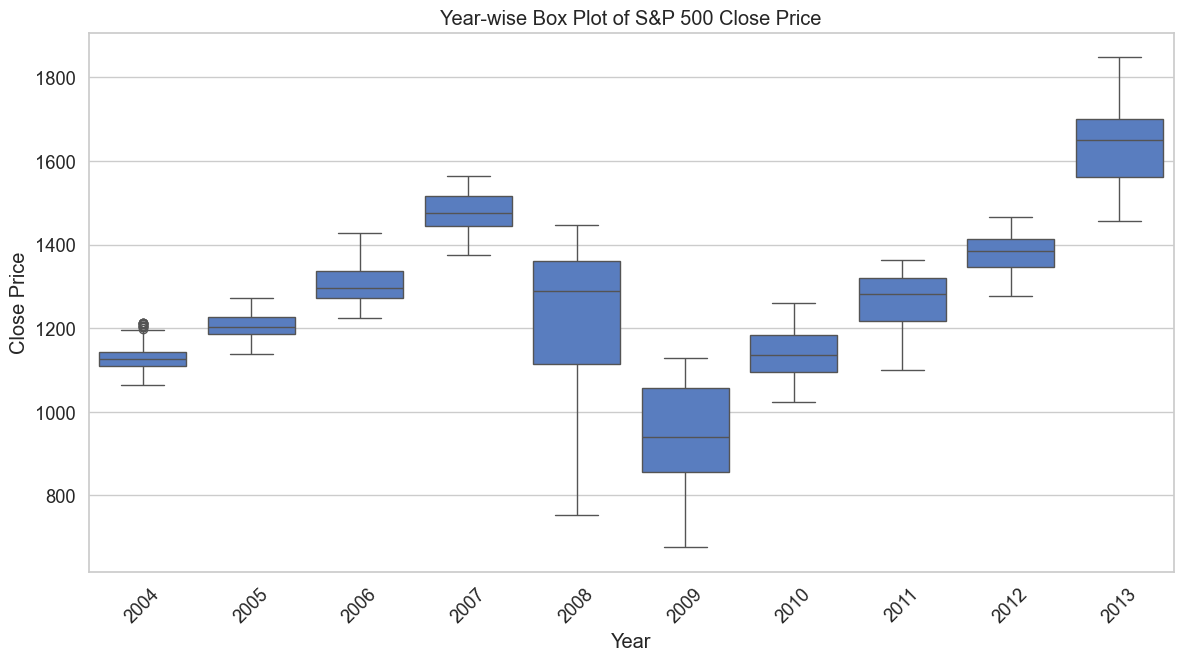

In [4]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year_', y='Close_^GSPC', data=oldest_years.reset_index())
plt.title('Year-wise Box Plot of S&P 500 Close Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

**Oldest years (2004-2013):**
   - This chart covers the previous decade and shows a less pronounced growth trend compared to the later years.
   - The 2008 financial crisis is evident, as the box plot for that year shows a low median and a wide downward spread, indicating the market’s steep decline.
   - After 2008, prices begin to stabilize with a slow but steady recovery until 2013, where a significant rise is observed compared to previous years.

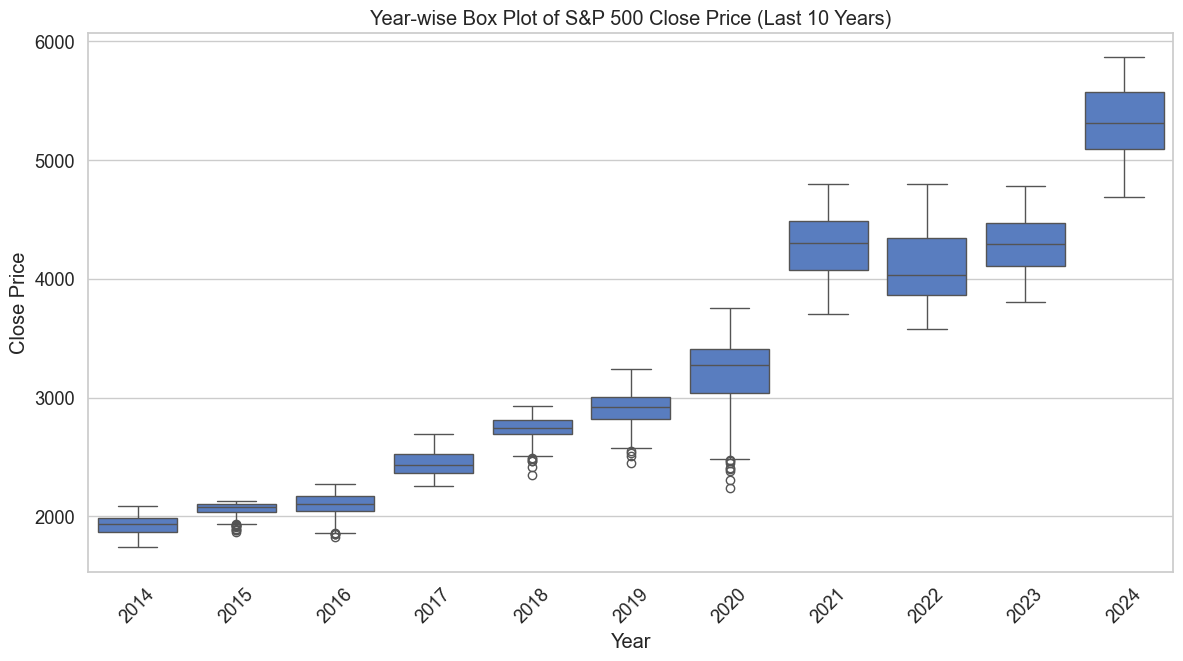

In [5]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year_', y='Close_^GSPC', data=recent_years.reset_index())
plt.title('Year-wise Box Plot of S&P 500 Close Price (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

**Recent years (2014-2024):**
   - This chart shows a significant growth in closing prices over the past ten years, with the S&P 500 moving from a median around 2000 in 2014 to values above 5000 in 2024.
   - The variability in closing prices has increased over time, with longer bars and greater dispersion, especially around 2020, likely corresponding to the market instability caused by the COVID-19 pandemic.
   - After 2020, there is a noticeable recovery with steady median growth, indicating a phase of market rebound and growth.

In summary, the two charts highlight that the S&P 500 experienced more consistent and pronounced growth in the past decade (2014-2024), while the period from 2004-2013 was heavily influenced by the 2008 crisis.

## 3- Seasonal Plot: Month-wise Box Plot 

### 3.1 Older years

This section generates month-wise box plots to examine the seasonal patterns in the S&P 500 close prices. By isolating each month across recent years, these plots allow us to observe variations and seasonal trends in the closing prices for each month. This can help identify recurring monthly behaviors in the S&P 500, which may be influenced by market cycles, economic events, or investor sentiment.

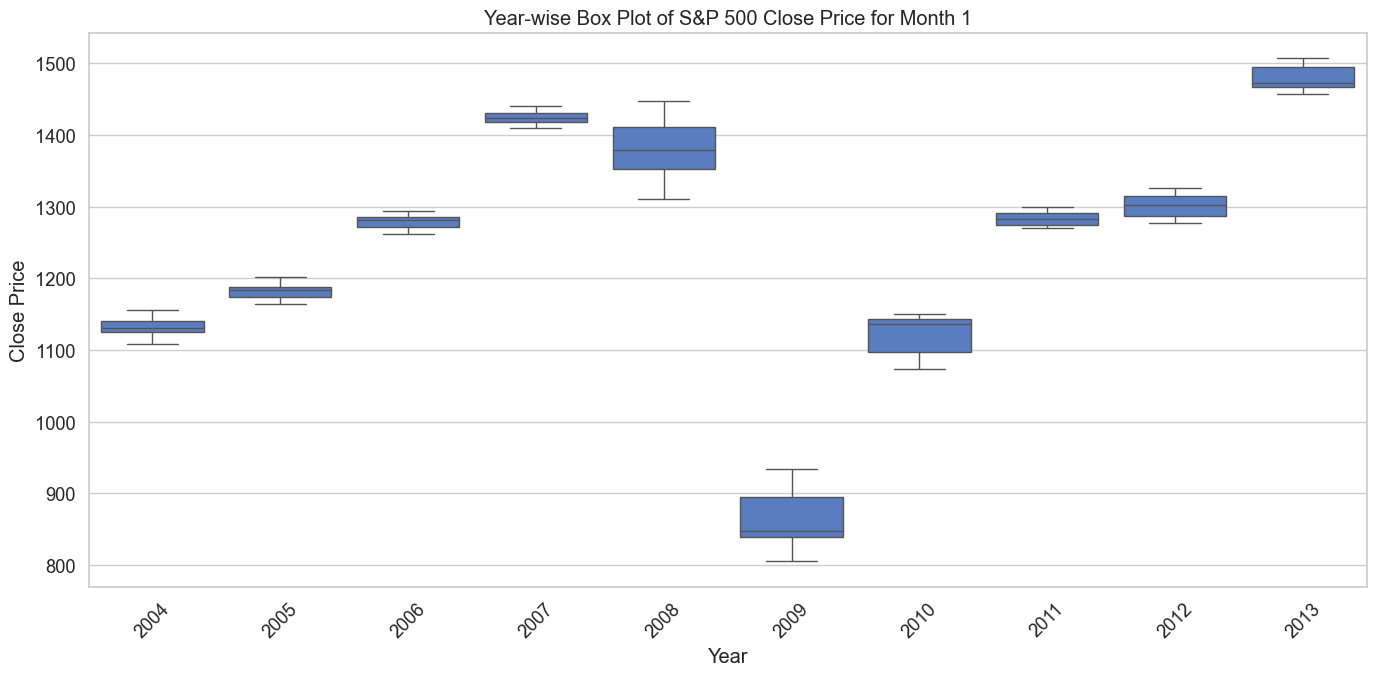

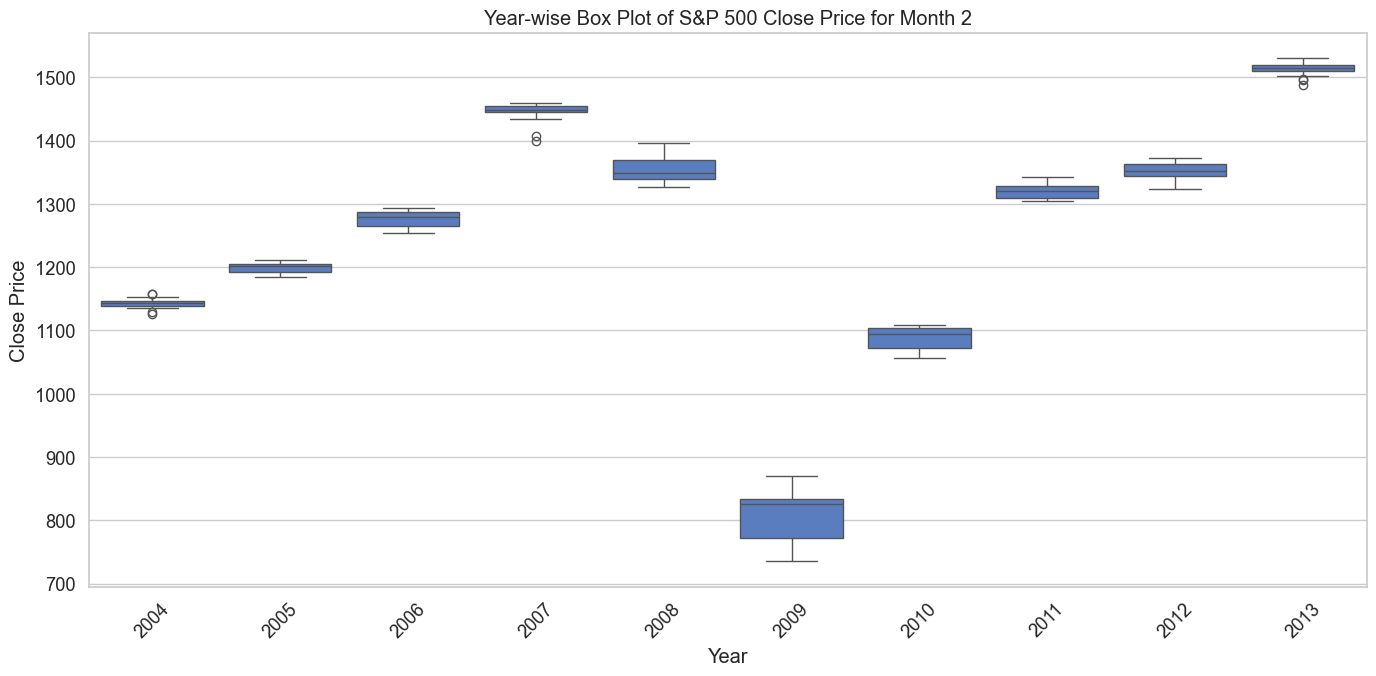

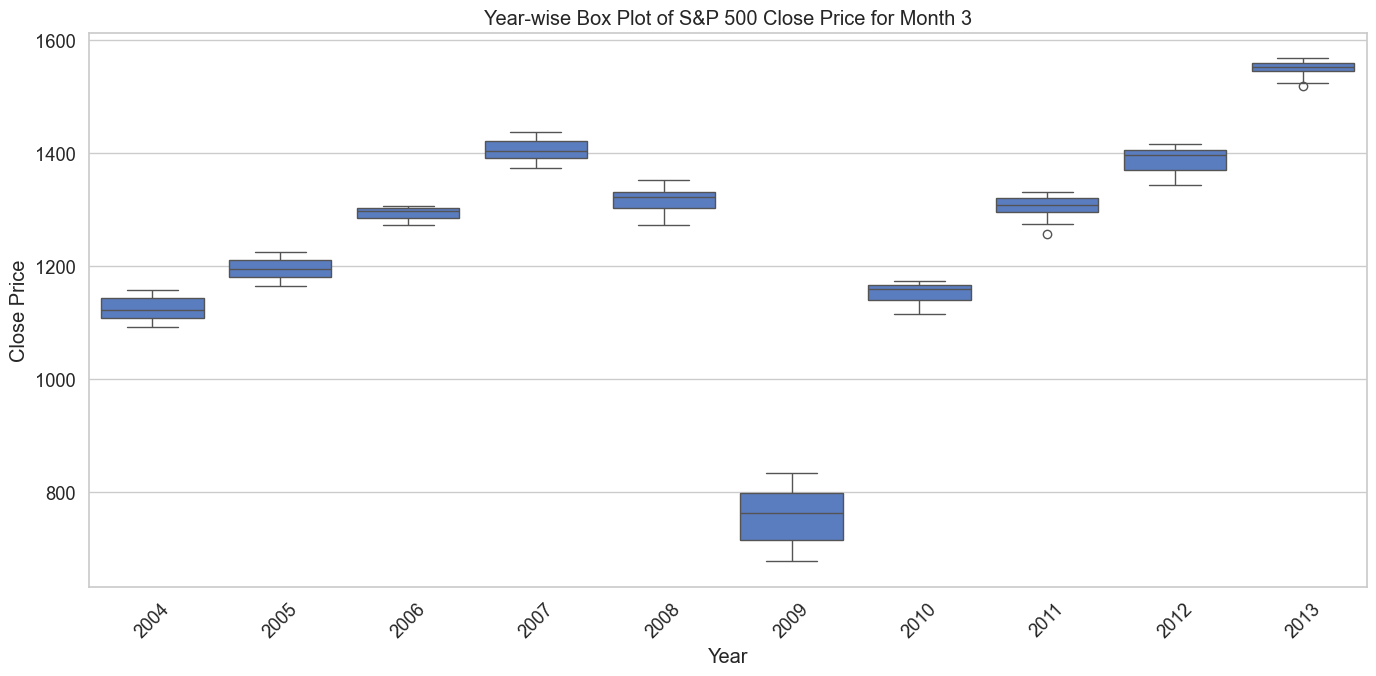

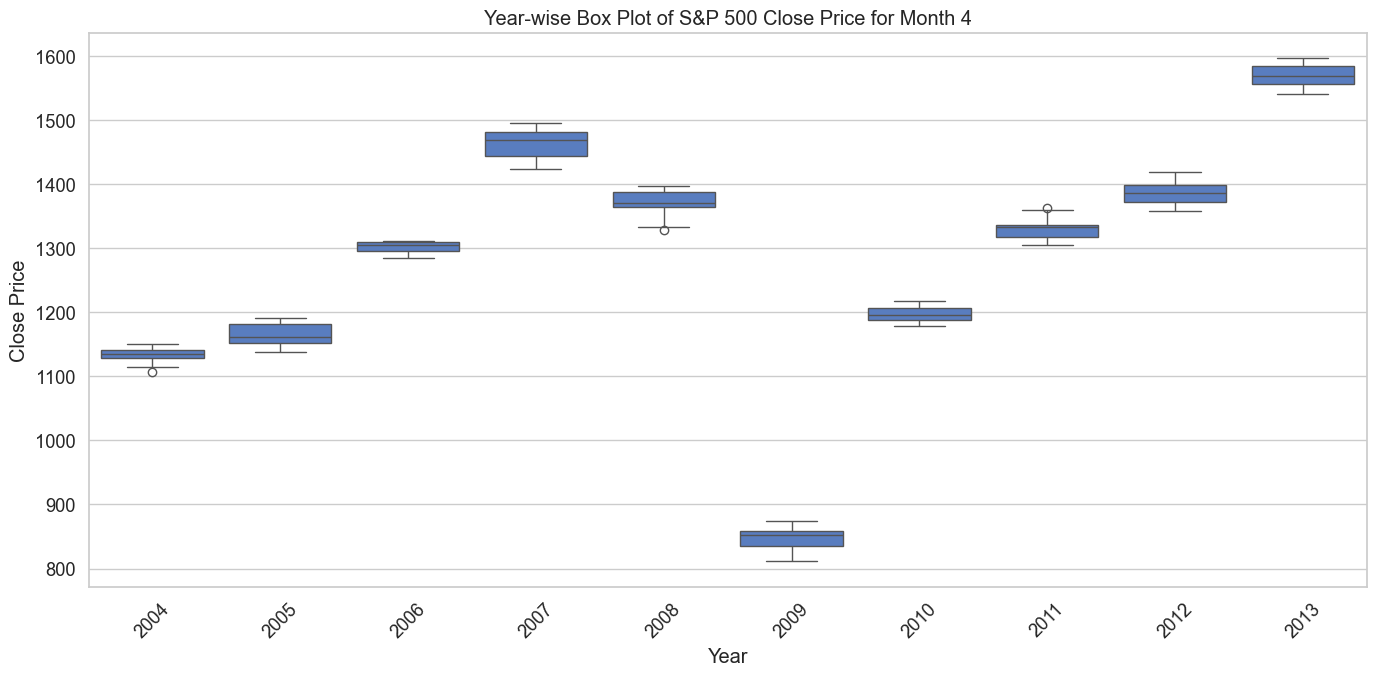

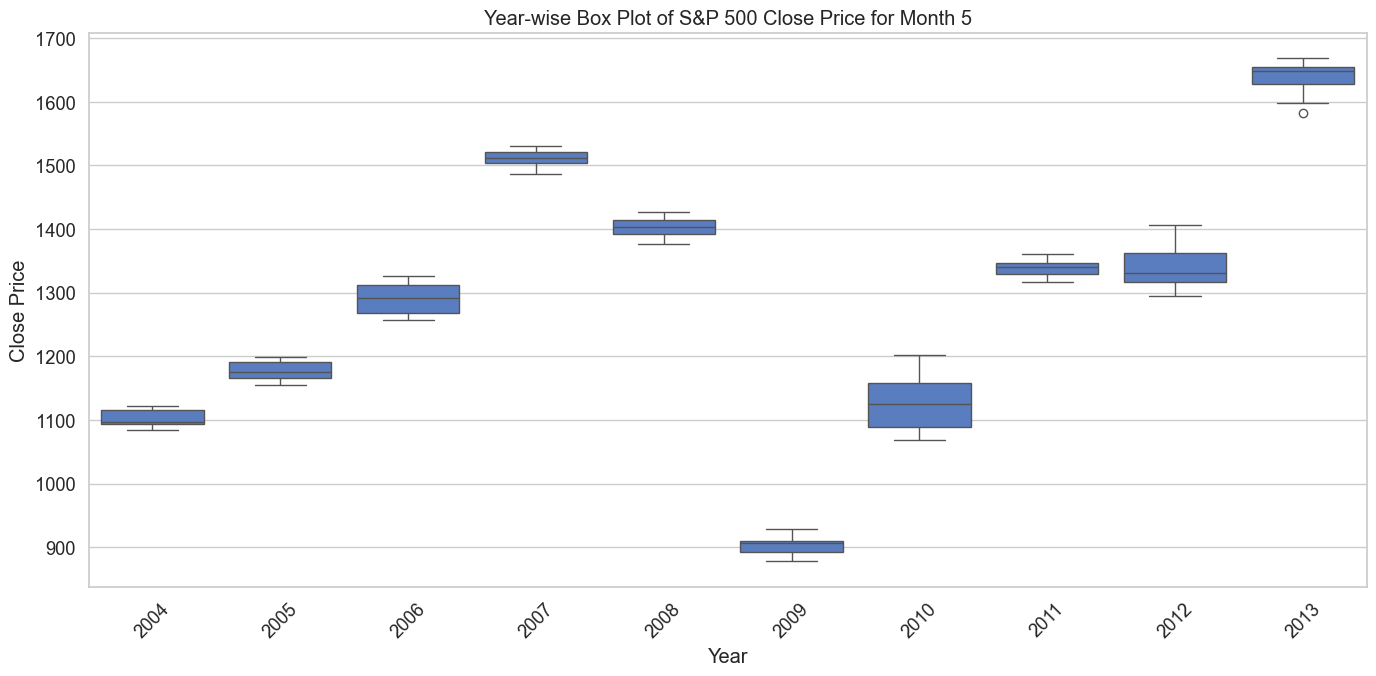

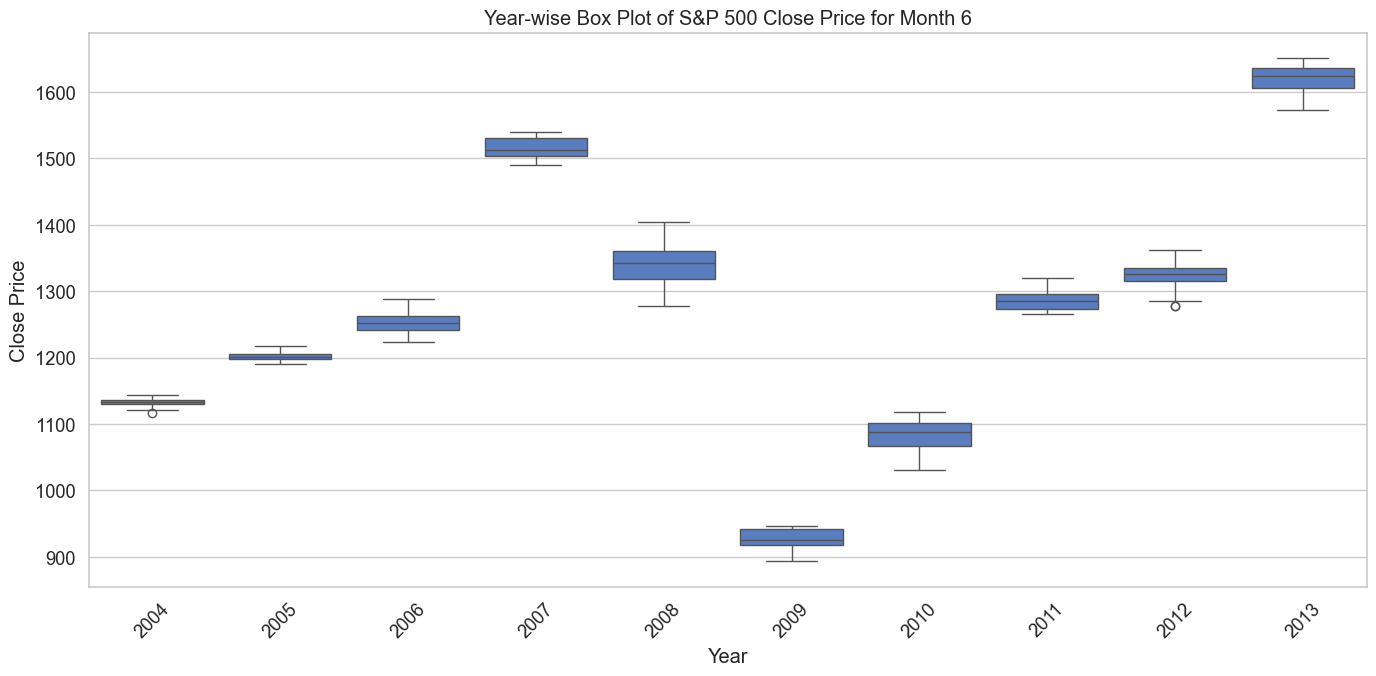

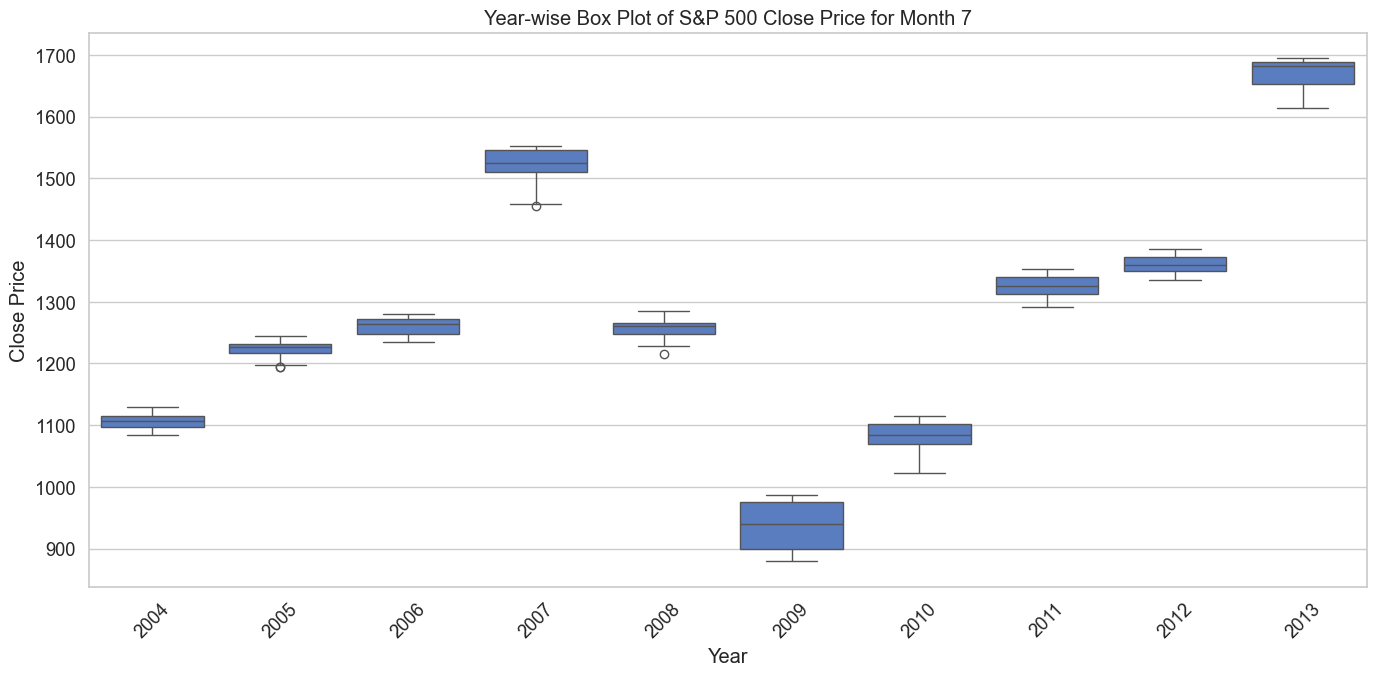

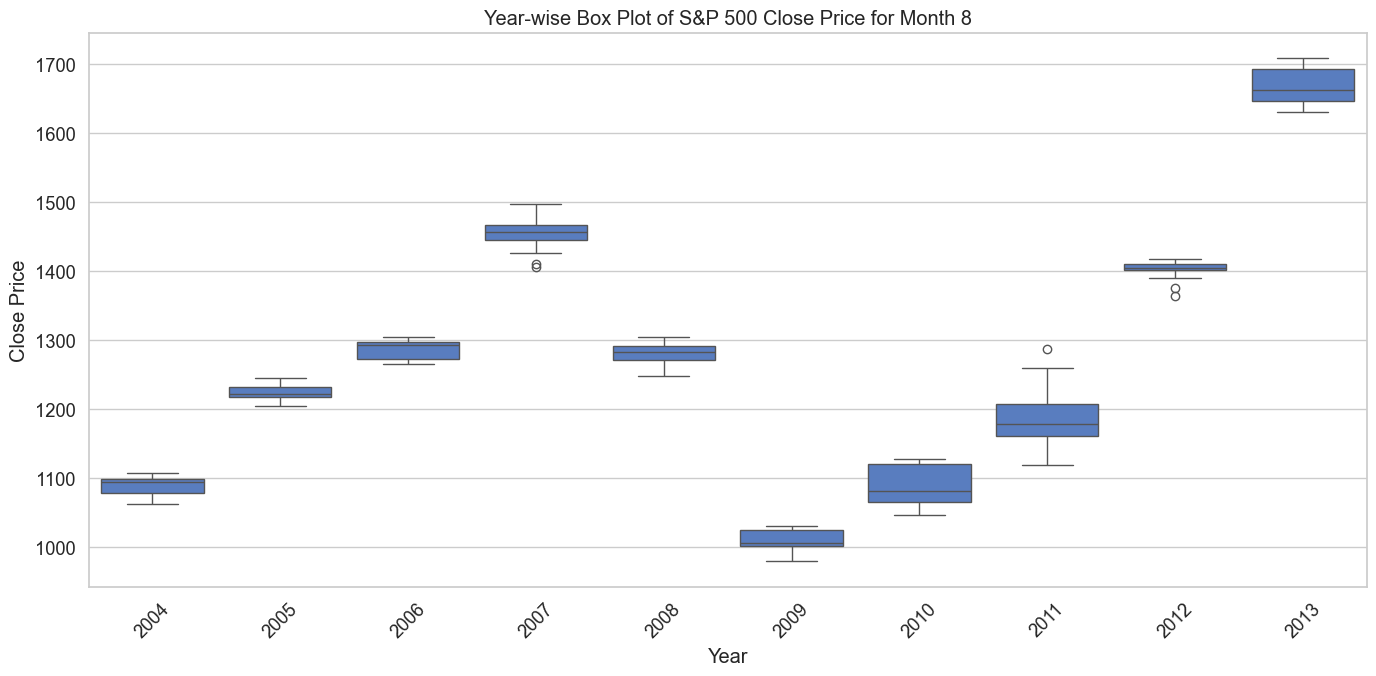

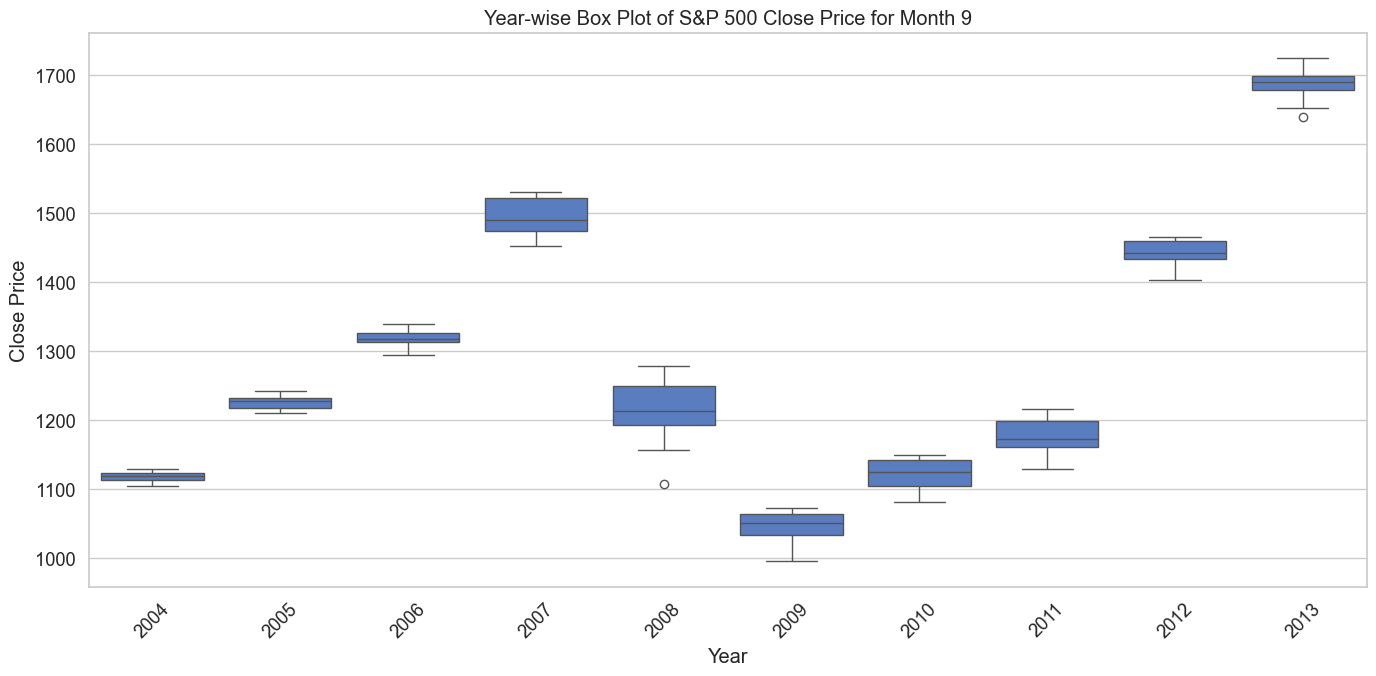

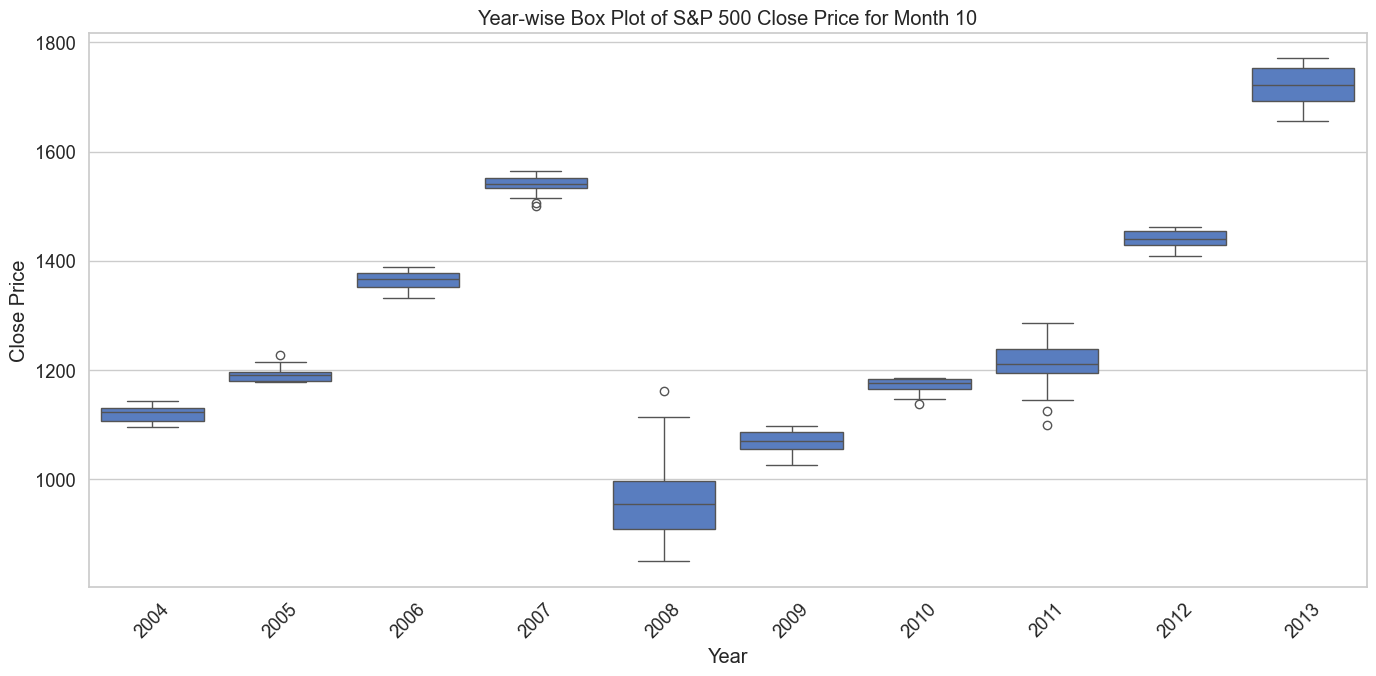

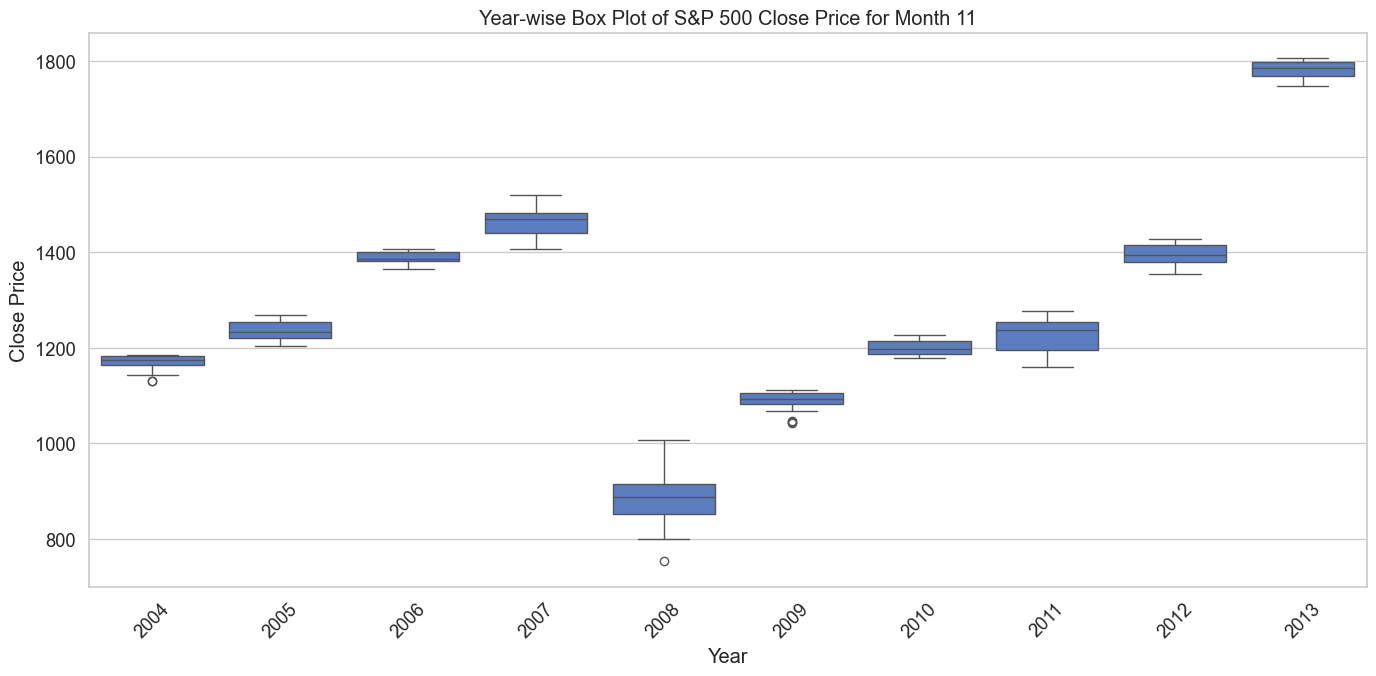

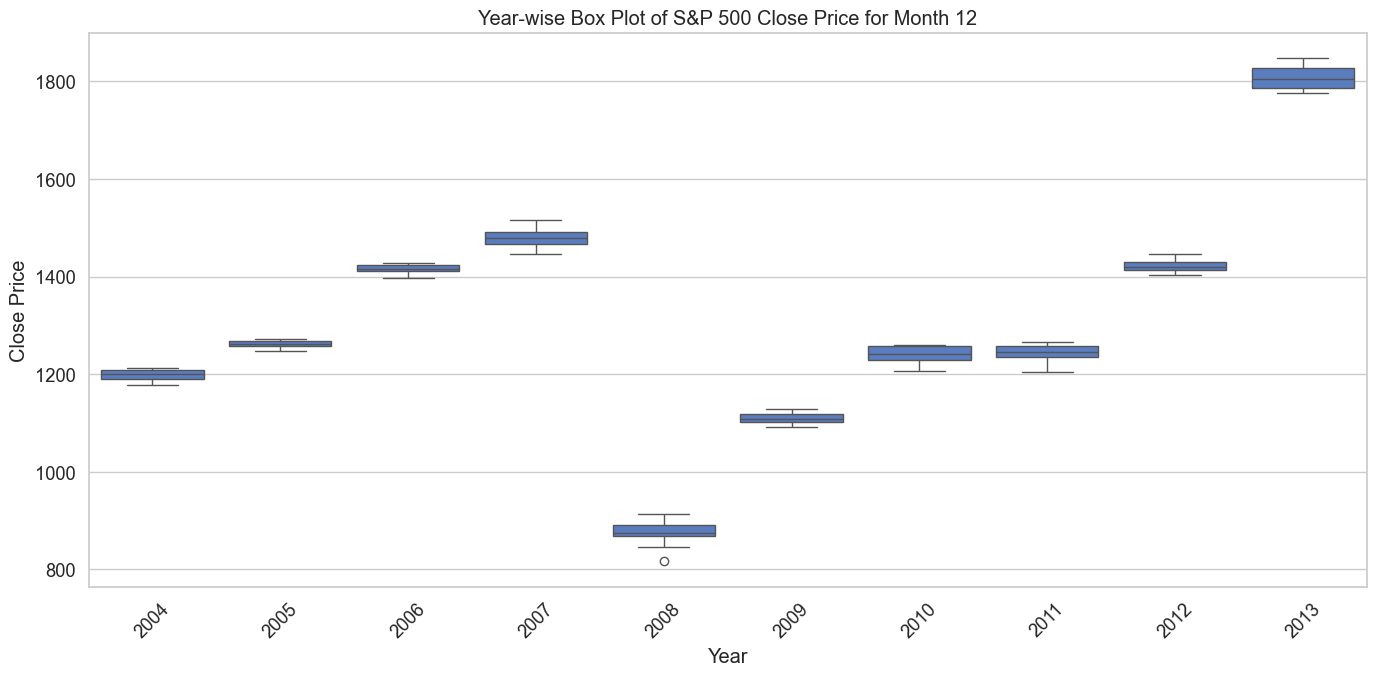

In [7]:
# Get the list of unique months and sort them
months = oldest_years['Month_'].unique()
months.sort()

for month in months:
    # Filter data for the specific month and recent years
    month_data = oldest_years[(oldest_years['Month_'] == month) ]
    
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Year_', y='Close_^GSPC', data=month_data.reset_index())
    plt.title(f'Year-wise Box Plot of S&P 500 Close Price for Month {month}')
    plt.xlabel('Year')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


The 12 box plots show the monthly close prices of the S&P 500 over multiple years, highlighting trends, volatility, and the impact of major economic events. Key observations include:

1. **Volatility Patterns**: Significant volatility is evident in 2008 and 2009 across several months, particularly during the global financial crisis. This period shows the most substantial drop in median prices and an increase in the interquartile range, indicating high market instability.

2. **Post-Crisis Recovery**: From 2010 onward, there’s a noticeable recovery in prices, with gradually increasing medians and narrowing spreads. This reflects a more stable upward trend as the economy recovers.

3. **Seasonal Trends**: Some months (e.g., January, December) show slightly higher median prices compared to others, suggesting possible seasonal effects or end-of-year investor behavior.

4. **Outliers**: Sporadic outliers appear in certain months and years, reflecting exceptional market days that deviate significantly from the median. These could be due to specific events or investor reactions.

Overall, these box plots provide a clear visual summary of the S&P 500's performance, illustrating how major economic events and seasonal variations impact the index over time.

### 3.2 Recent years

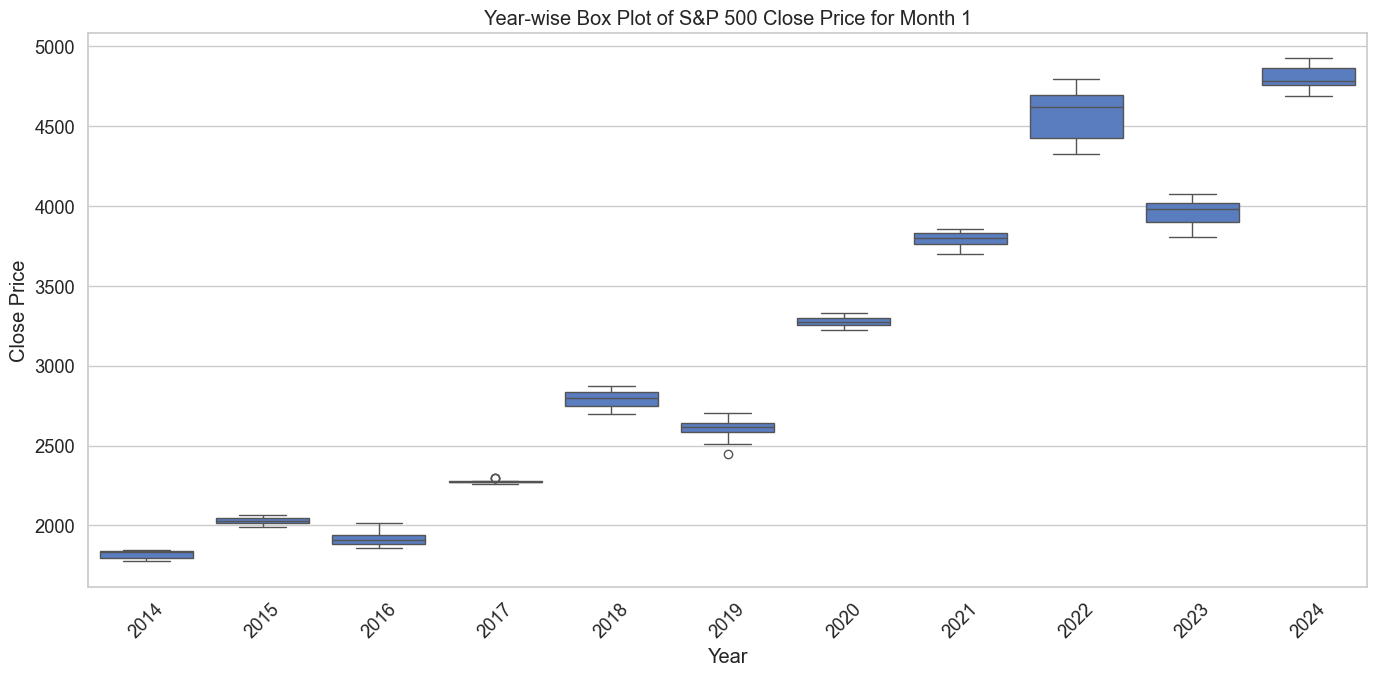

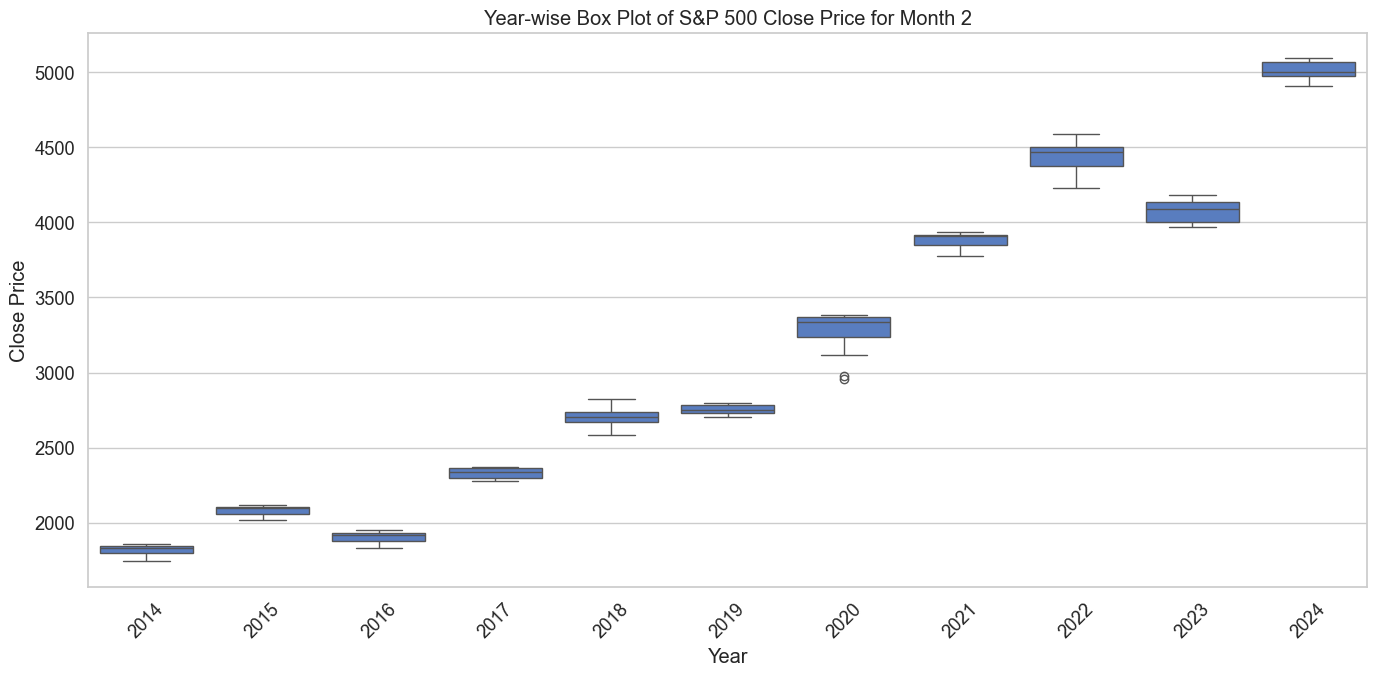

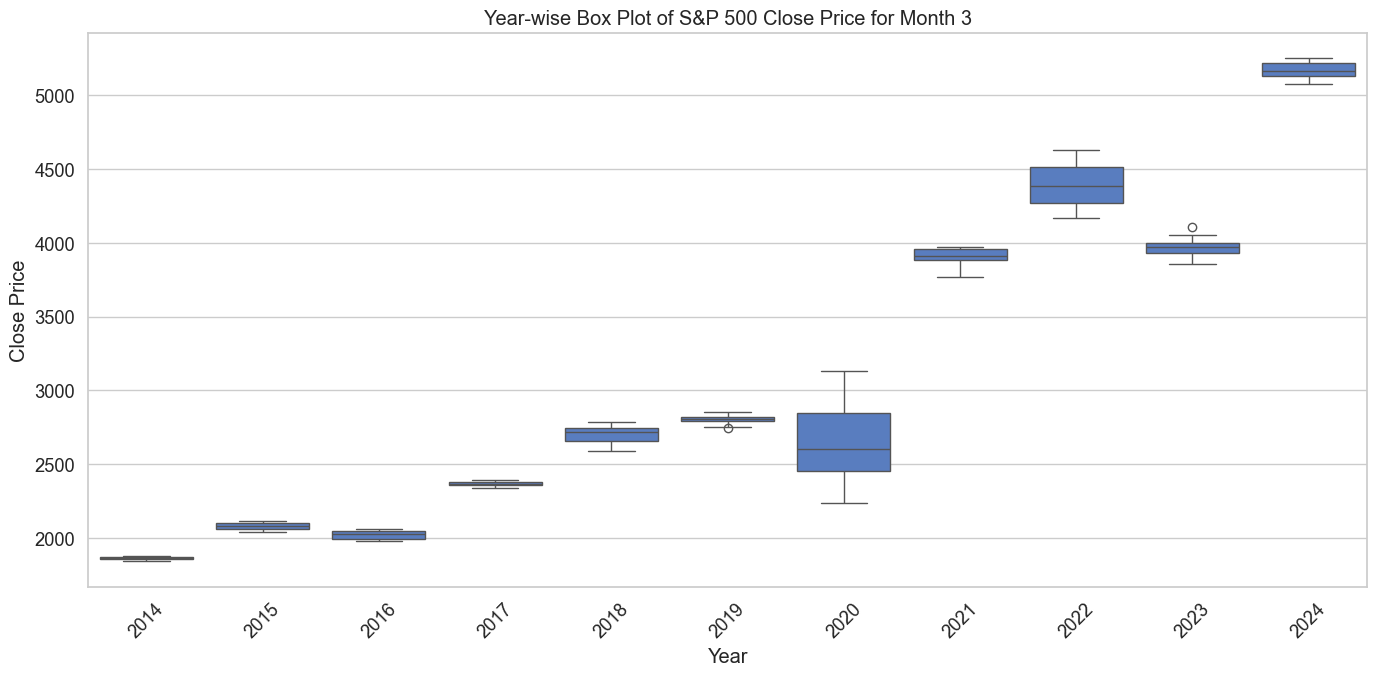

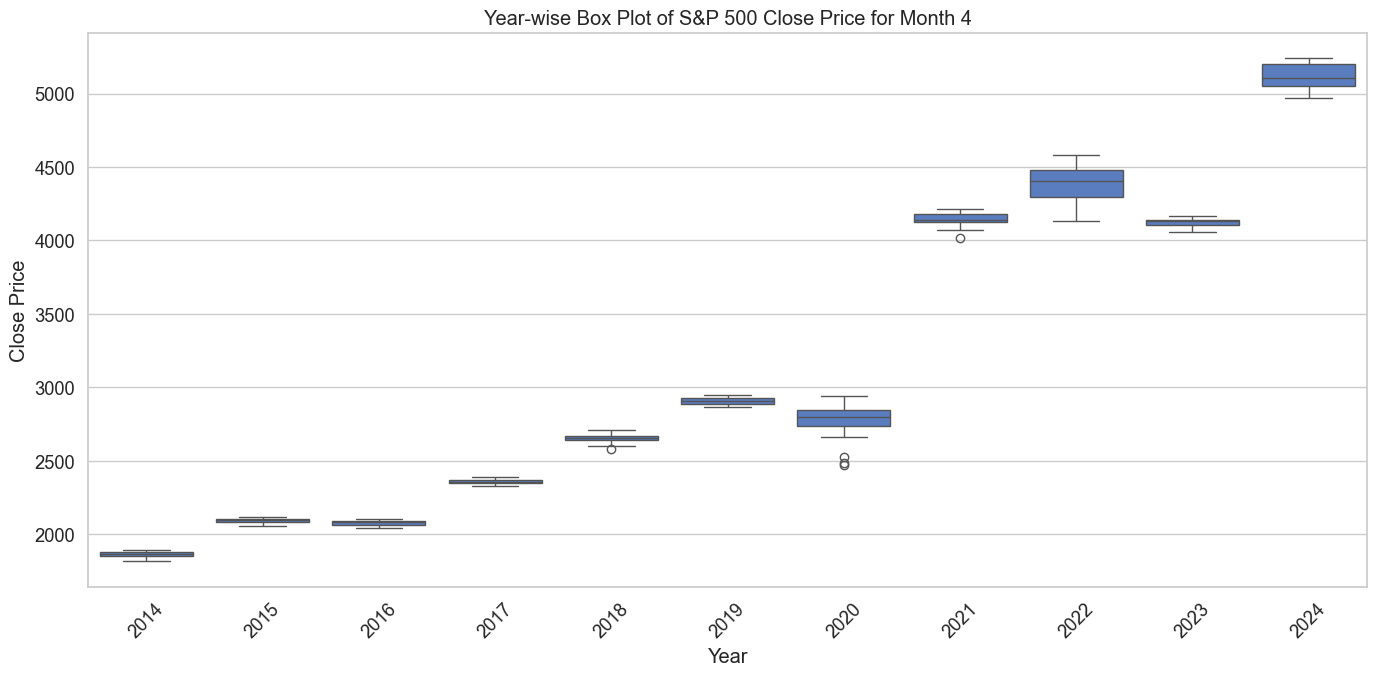

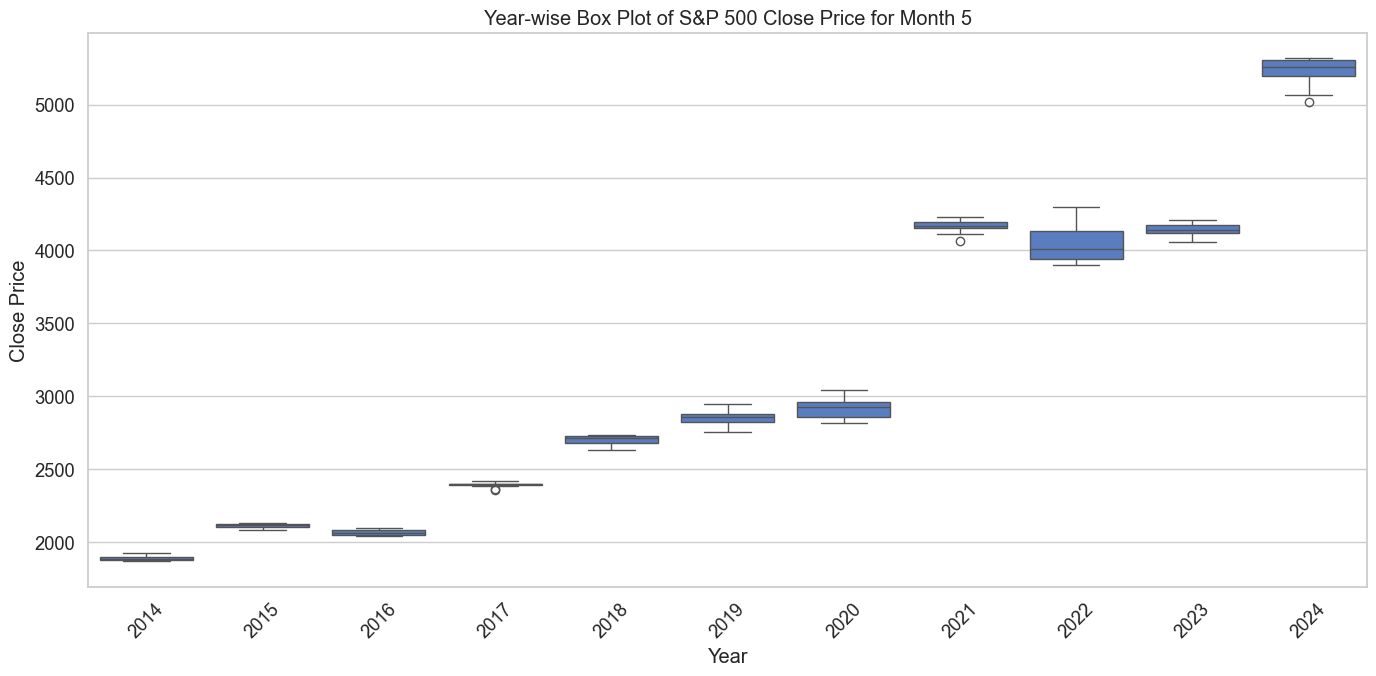

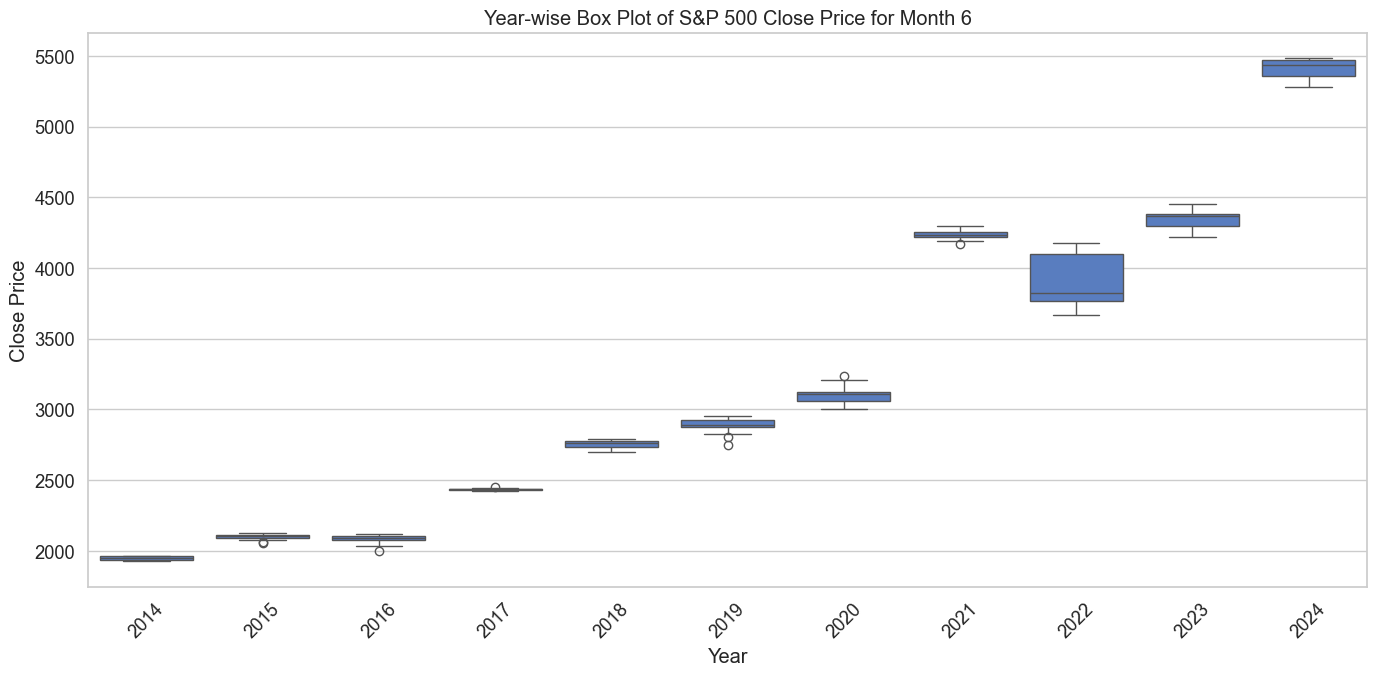

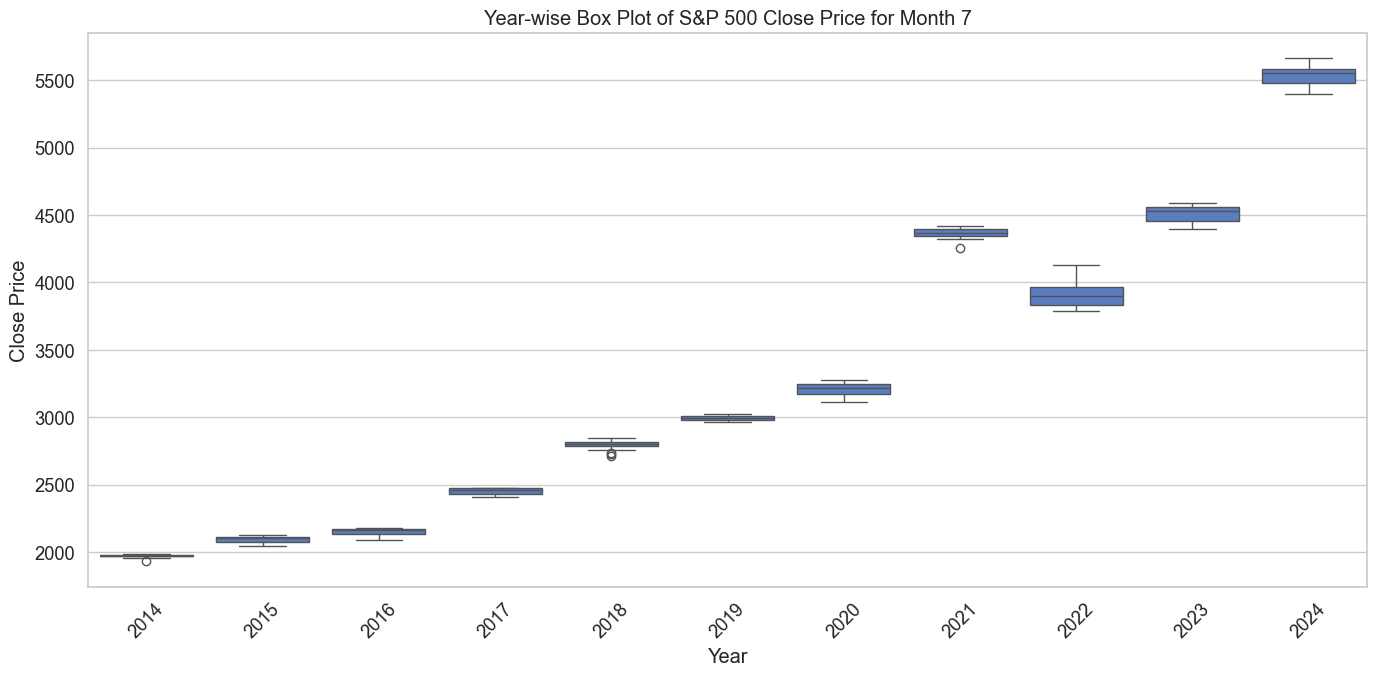

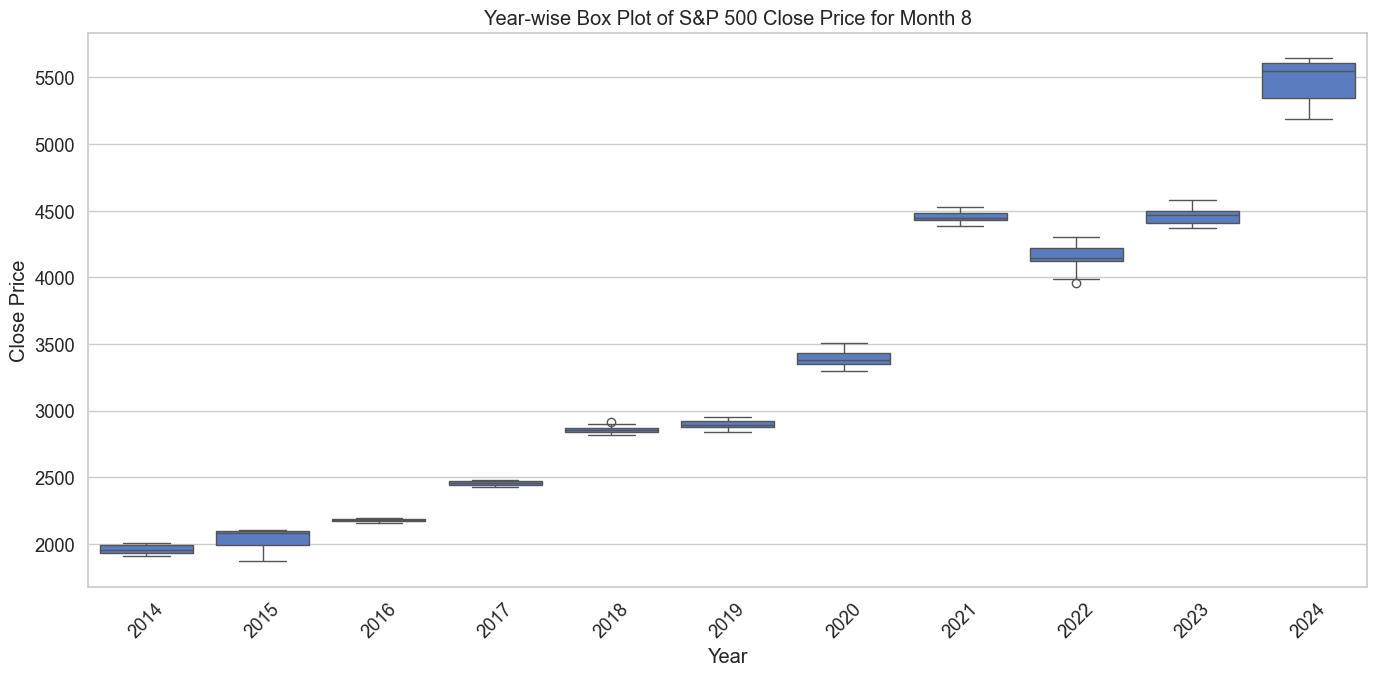

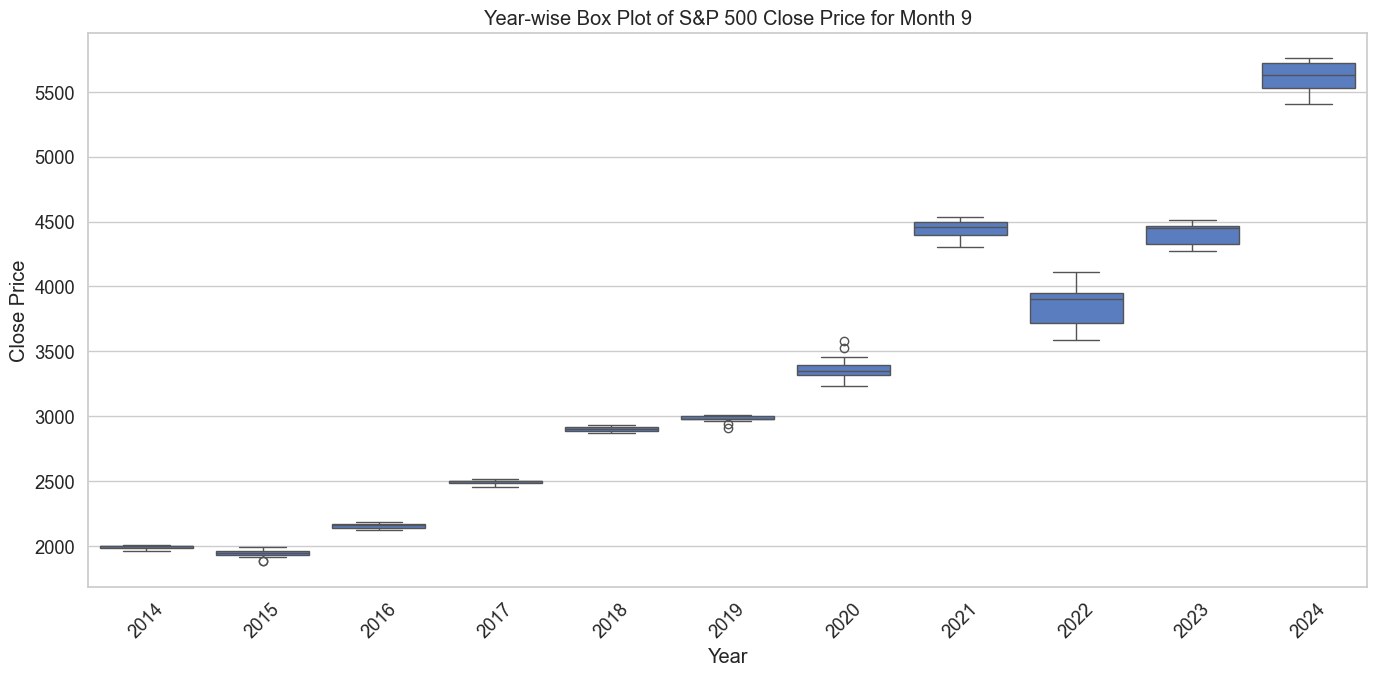

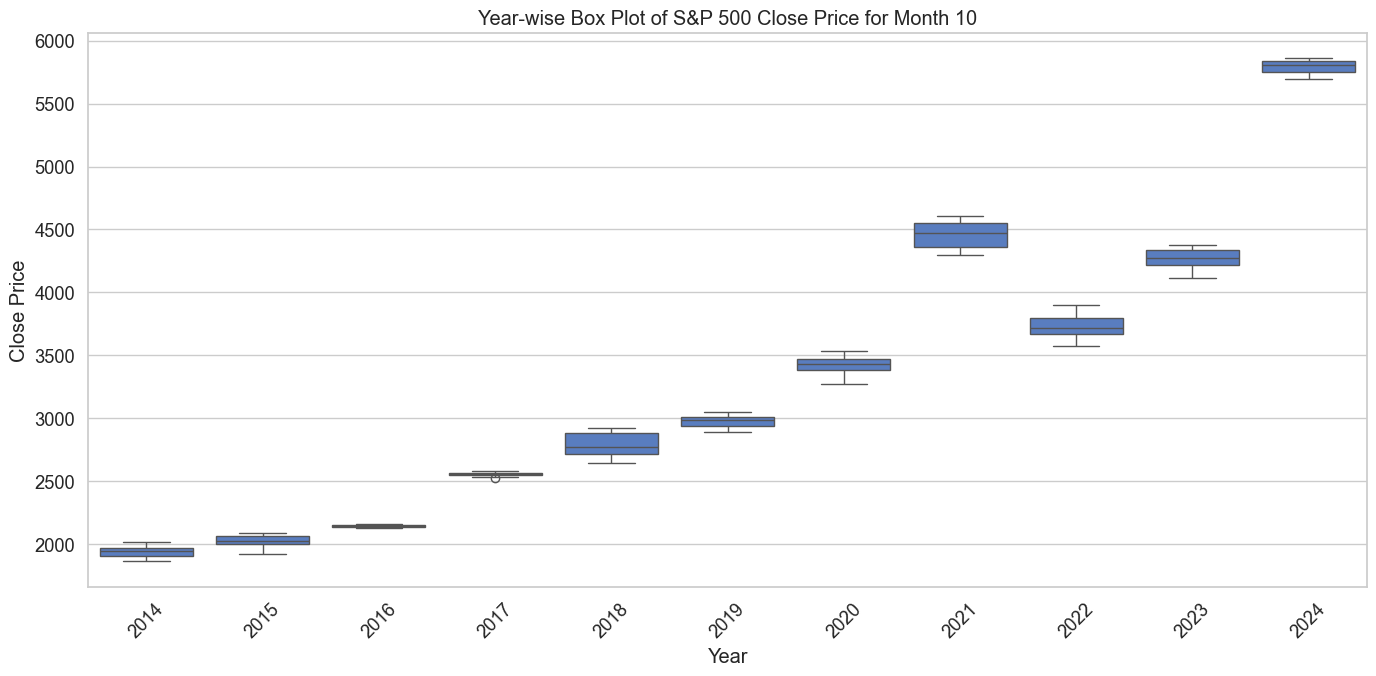

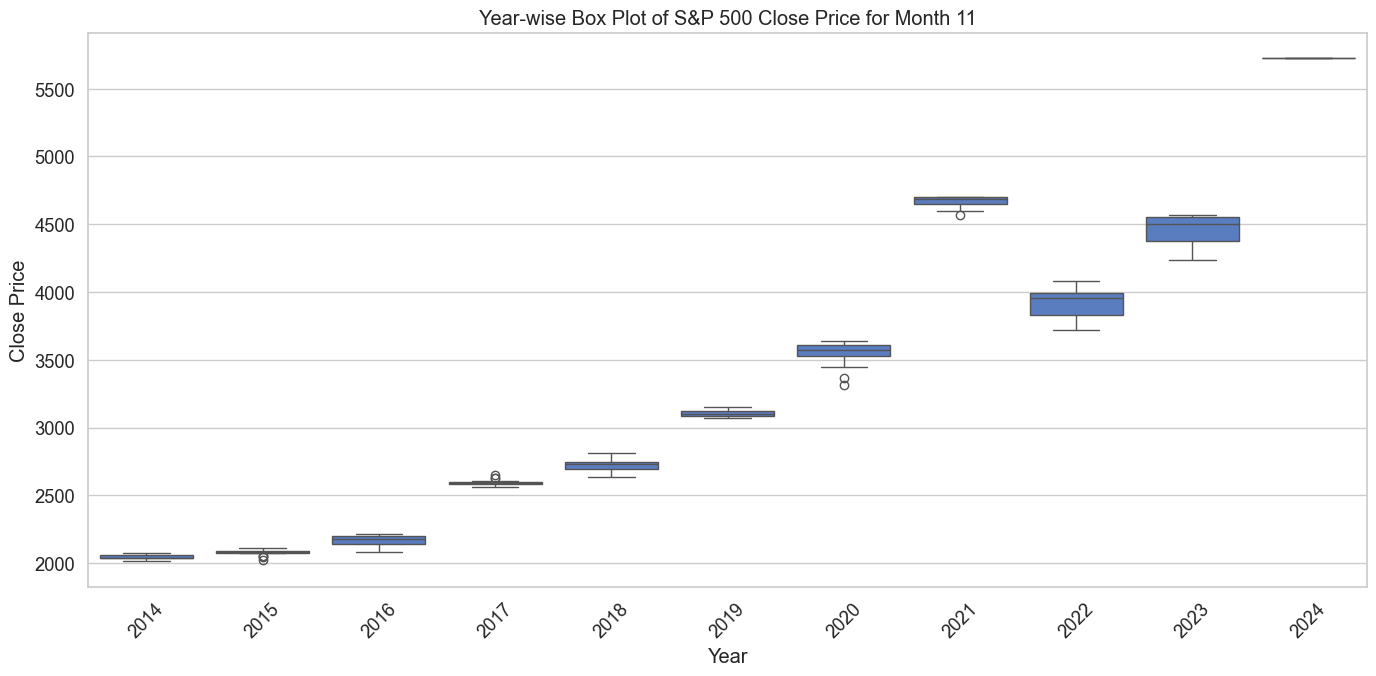

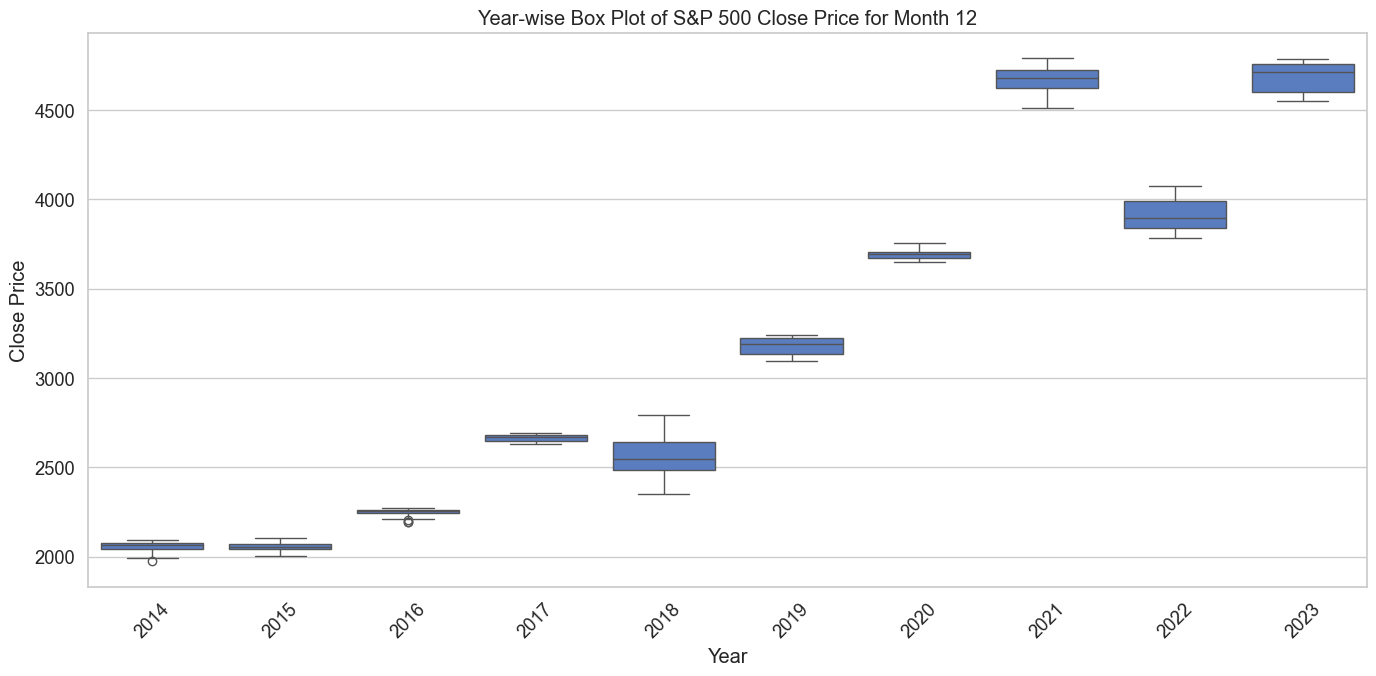

In [8]:
# Get the list of unique months and sort them
months = recent_years['Month_'].unique()
months.sort()

for month in months:
    # Filter data for the specific month and recent years
    month_data = recent_years[(recent_years['Month_'] == month) ]
    
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Year_', y='Close_^GSPC', data=month_data.reset_index())
    plt.title(f'Year-wise Box Plot of S&P 500 Close Price for Month {month}')
    plt.xlabel('Year')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The 12 box plots from 2014 to 2024 illustrate the year-wise S&P 500 close prices for each month, showing an overall upward trend with fluctuations in volatility across the years.

1. **Consistent Upward Trend**: There is a clear growth in median close prices, especially pronounced from 2020 onward, reflecting a general market uptrend. This may be due to various economic factors, including recovery from past downturns and continued investor confidence.

2. **Volatility Peaks in Specific Years**: Notably, 2020 displays increased volatility across several months, likely influenced by the COVID-19 pandemic. The wider interquartile ranges and the presence of outliers in 2020 highlight the uncertainty and market instability during this period.

3. **Post-Pandemic Stabilization**: After 2020, we see a steady upward movement with narrowing interquartile ranges, suggesting stabilization. For example, from 2021 to 2024, close prices gradually increase with less extreme price fluctuations.

4. **Recent Highs**: By 2023 and 2024, the S&P 500 reaches new highs across most months, with higher median prices and fewer outliers, indicating a strong market position with relatively consistent growth.

In summary, these box plots capture the resilience and growth of the S&P 500 over the past decade, despite periods of market turbulence. The trend shows how the index has recovered from events like the pandemic, with an evident upward trajectory in recent years, suggesting strong market performance.

## 4. Average Monthly and Quarterly on Close Prices

### 4.1 Average monthly closing prices

In this section, we calculate the average monthly closing prices of the S&P 500 over the past ten years (2014-2024) to analyze seasonal trends and yearly variations. By grouping the data by year and month, we can observe how the S&P 500's average price has evolved across different years and whether specific months exhibit consistent patterns. 

The code below performs the following steps:
1. Groups the closing price data by year and month, calculating the mean closing price for each combination.
2. Pivots the data to organize it by month, with each year represented as a separate column, making it easier to visualize yearly trends on a single chart.
3. Plots the monthly averages for each year, adding labels and a legend for clarity.

This visualization will help us identify any seasonal trends or significant deviations in specific years, providing insights into the historical behavior of the S&P 500 over this period.


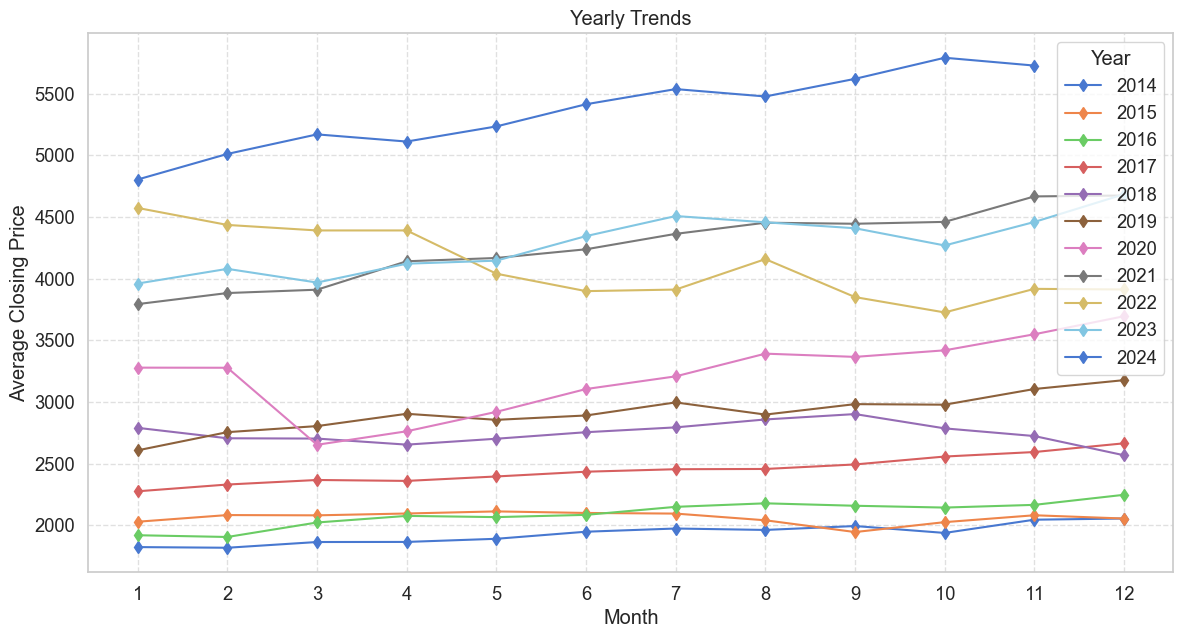

In [ ]:
# Compute average of closing prices per year and month
monthly_avg = recent_years.groupby(['Year_', 'Month_'])['Close_^GSPC'].mean().reset_index()

# Pivot of datas to get a better format for graphic rappresentation
pivot_data = monthly_avg.pivot(index='Month_', columns='Year_', values='Close_^GSPC')

# Chart
plt.figure(figsize=(14, 7))
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], marker='d', label=year)

# Add details to chart
plt.title('Yearly Trends')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13))  # Set tick on x-axis for months
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot
plt.show()

The chart shows the monthly average closing prices of the S&P 500 for each year from 2014 to 2024. Each line represents a different year, allowing us to observe trends and seasonal patterns. 

Notably:
- The values tend to increase year over year, reflecting the general upward trend of the S&P 500.
- 2024 shows the highest average closing prices across all months, highlighting a continued growth trajectory.
- Certain months, especially around mid-year, appear to have peaks, possibly indicating typical seasonal increases or market conditions favorable to growth around these times.
- The dip in 2020 is evident, consistent with the market's reaction to the COVID-19 pandemic, with lower values relative to adjacent years.

In this section, we analyze the average monthly closing prices of the S&P 500 over a different time period (2004-2013) to observe how the market behaved during these years. By plotting the average closing prices by month for each year, we can identify any seasonal trends, consistent patterns, or anomalies that may have influenced the S&P 500. This analysis will help us compare trends across years and assess the impact of significant events, such as the 2008 financial crisis, on monthly performance.

The code calculates the average closing prices for each month and year, formats the data for a year-over-year trend analysis, and then visualizes it with a line plot where each line represents a specific year.

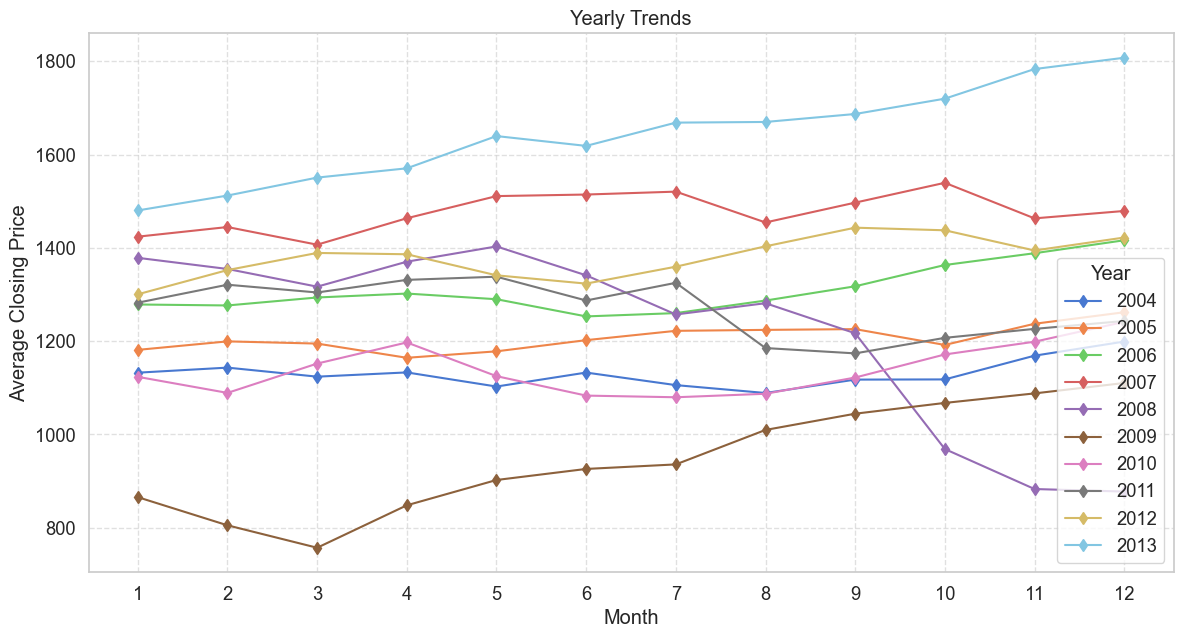

In [10]:
# Compute average of closing prices per year and month
old_monthly_avg = oldest_years.groupby(['Year_', 'Month_'])['Close_^GSPC'].mean().reset_index()

# Pivot of datas to get a better format for graphic rappresentationa
old_pivot_data = old_monthly_avg.pivot(index='Month_', columns='Year_', values='Close_^GSPC')

# Chart
plt.figure(figsize=(14, 7))
for year in old_pivot_data.columns:
    plt.plot(old_pivot_data.index,old_pivot_data[year], marker='d', label=year)

# Add details to chart
plt.title('Yearly Trends')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13))  # Set tick on x-axis for months
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.6)

# Mostra il grafico
plt.show()

The chart illustrates the monthly average closing prices of the S&P 500 from 2004 to 2013. Each line corresponds to a different year, showcasing how the average closing prices fluctuated across months and years.

Key observations:
- The period from 2004 to 2007 shows a relatively steady growth pattern, with gradual increases in average prices over the months.
- The year 2008 stands out sharply due to the steep decline, which corresponds to the global financial crisis. This drop is particularly noticeable in the last few months of 2008.
- From 2009 onward, the market shows a gradual recovery, with the closing prices stabilizing and then increasing year by year.
- The year 2013 ends on a high note, indicating a strong recovery phase and steady growth after the financial crisis.
  
This chart effectively highlights the impact of the 2008 crisis on the S&P 500 and the subsequent recovery, illustrating both the market's resilience and the long-term upward trend across these years.

### 4.2 Average quarterly trends

In this section, we analyze the average quarterly trends of the S&P 500 close prices to identify seasonal patterns and variations across different years. By calculating the mean close price for each quarter and comparing it year by year, we aim to observe how quarterly performance changes over time. This analysis provides insight into recurring trends and can help reveal the consistency or volatility of the market within each quarter.

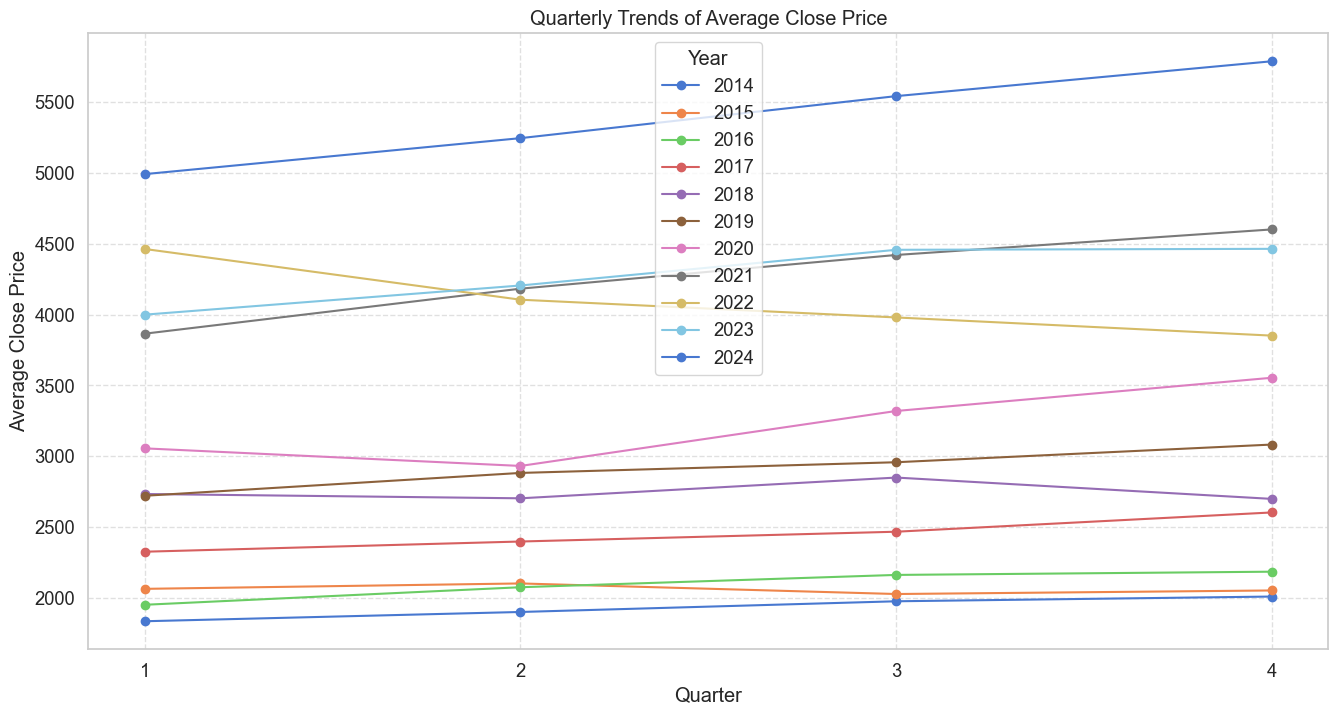

In [11]:
# Calculate the average close price for each year and quarter
quarterly_avg = recent_years.groupby(['Year_', 'Quarter_'])['Close_^GSPC'].mean().reset_index()

# Pivot the data to get a more suitable format for the line plot
pivot_data_quart = quarterly_avg.pivot(index='Quarter_', columns='Year_', values='Close_^GSPC')

# Create the plot
plt.figure(figsize=(16, 8))
for year in pivot_data_quart.columns:
    plt.plot(pivot_data_quart.index, pivot_data_quart[year], marker='o', label=year)

# Adding chart details
plt.title('Quarterly Trends of Average Close Price')
plt.xlabel('Quarter')
plt.ylabel('Average Close Price')
plt.xticks(range(1, 5))  # Set x-axis ticks for the quarters
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


Several key trends can be observed:

1. **Consistent Upward Trend in Recent Years**: From around 2021 onward, the lines for each year indicate an upward trend in average close prices across the quarters, reflecting a strengthening market. This is especially notable in 2023 and 2024, where prices increase consistently each quarter.

2. **Impact of 2020**: The line representing 2020 shows a unique pattern with higher prices in the first quarter followed by a dip, likely reflecting the market volatility and initial impact of the COVID-19 pandemic. This trend contrasts sharply with the years before and after it.

3. **Stabilization of Pre-2020 Years**: Years prior to 2020, such as 2017, 2018, and 2019, display more gradual or flatter trends in quarterly average prices, indicating a period of relative stability compared to the recent volatile years.

4. **Comparative Performance**: The plot shows clear distinctions in performance, with recent years (post-2021) reaching significantly higher price levels than earlier years (2014-2018), demonstrating the growth in the index over the last decade.

Overall, this chart effectively highlights both the quarterly and annual trends in the S&P 500, with marked growth in recent years following the 2020 economic shock.

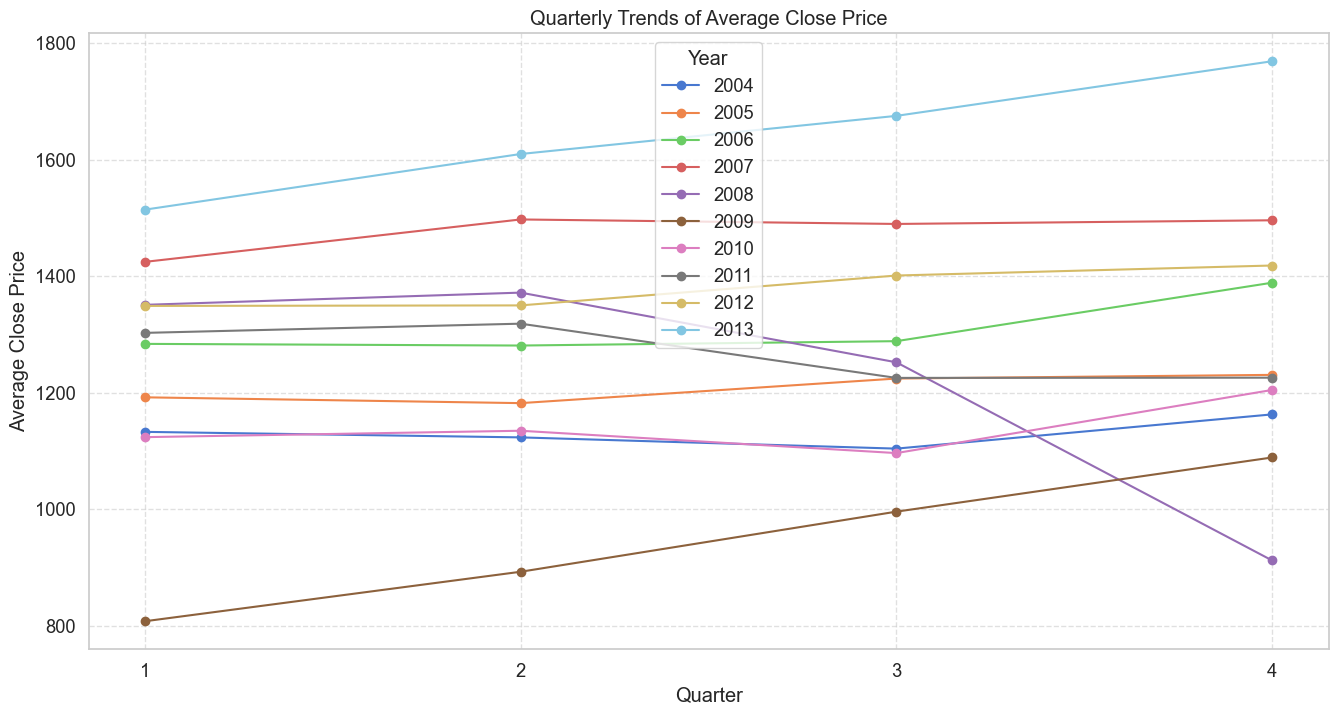

In [12]:
# Calculate the average close price for each year and quarter
old_quarterly_avg = oldest_years.groupby(['Year_', 'Quarter_'])['Close_^GSPC'].mean().reset_index()

# Pivot the data to get a more suitable format for the line plot
old_pivot_data_quart = old_quarterly_avg.pivot(index='Quarter_', columns='Year_', values='Close_^GSPC')

# Create the plot
plt.figure(figsize=(16, 8))
for year in old_pivot_data_quart.columns:
    plt.plot(old_pivot_data_quart.index, old_pivot_data_quart[year], marker='o', label=year)

# Adding chart details
plt.title('Quarterly Trends of Average Close Price')
plt.xlabel('Quarter')
plt.ylabel('Average Close Price')
plt.xticks(range(1, 5))  # Set x-axis ticks for the quarters
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


Some notable observations include:

1. **Relatively Stable Years**: Most years between 2004 and 2007 show relatively stable quarterly trends, with only minor fluctuations. This period appears to have been marked by a steady growth trend, with slight upward slopes in each quarter, indicating consistent market performance.

2. **Significant Downward Shift in 2008**: The year 2008 shows a notable drop, especially in the latter quarters, reflecting the financial crisis and the sharp decline in market value. This year stands out as an anomaly, with a steep downward trajectory across quarters.

3. **Recovery Phase Post-2008**: From 2009 onwards, there is a gradual upward trend, especially noticeable in 2009 and 2010, showing the market’s recovery phase after the crisis. The lines for these years indicate a return to stability, albeit at a lower level compared to pre-2008 years.

4. **Flat Trends in Some Years**: Certain years, like 2011 and 2012, display a more flattened trend across the quarters, suggesting limited quarterly growth and a stable market environment during those years.

Overall, this chart reflects the market's behavior through the 2000s, highlighting the impact of the 2008 financial crisis and the subsequent recovery period. The chart provides insights into market stability and volatility, with sharp contrasts between pre- and post-crisis trends.

## 5 Moving Averages on closing prices

In this section, we examine the role of moving averages in analyzing the trends in S&P 500 closing prices over years. Moving averages are useful for smoothing out short-term fluctuations and highlighting longer-term trends, making them a popular tool for identifying market momentum and potential support or resistance levels.

We focus on three common types of simple moving averages (SMAs):
1. **10-day SMA** – captures short-term trends by averaging the closing prices over the last 10 days.
2. **50-day SMA** – represents intermediate-term trends, providing a broader perspective than the 10-day average.
3. **200-day SMA** – shows long-term trends, often used to gauge the overall market direction and investor sentiment.

By plotting these SMAs alongside the actual closing prices, we can observe how price movements align or diverge from their averages, which can serve as signals for potential buying or selling opportunities. The figure below demonstrates this analysis, illustrating the recent S&P 500 closing prices along with the 10-day, 50-day, and 200-day moving averages. This layered approach helps to clarify market trends across different time horizons, providing a deeper understanding of market behavior.

### 5.1 Recent Years

In [13]:
# Compute the 10-day SMA
recent_years['SMA_10'] = recent_years['Close_^GSPC'].rolling(window=10).mean()

# Compute the 50-day SMA
recent_years['SMA_50'] = recent_years['Close_^GSPC'].rolling(window=50).mean()

# Compute the 200-day SMA
recent_years['SMA_200'] = recent_years['Close_^GSPC'].rolling(window=200).mean()


C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\1560436146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_years['SMA_10'] = recent_years['Close_^GSPC'].rolling(window=10).mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\1560436146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_years['SMA_50'] = recent_years['Close_^GSPC'].rolling(window=50).mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\1560436146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

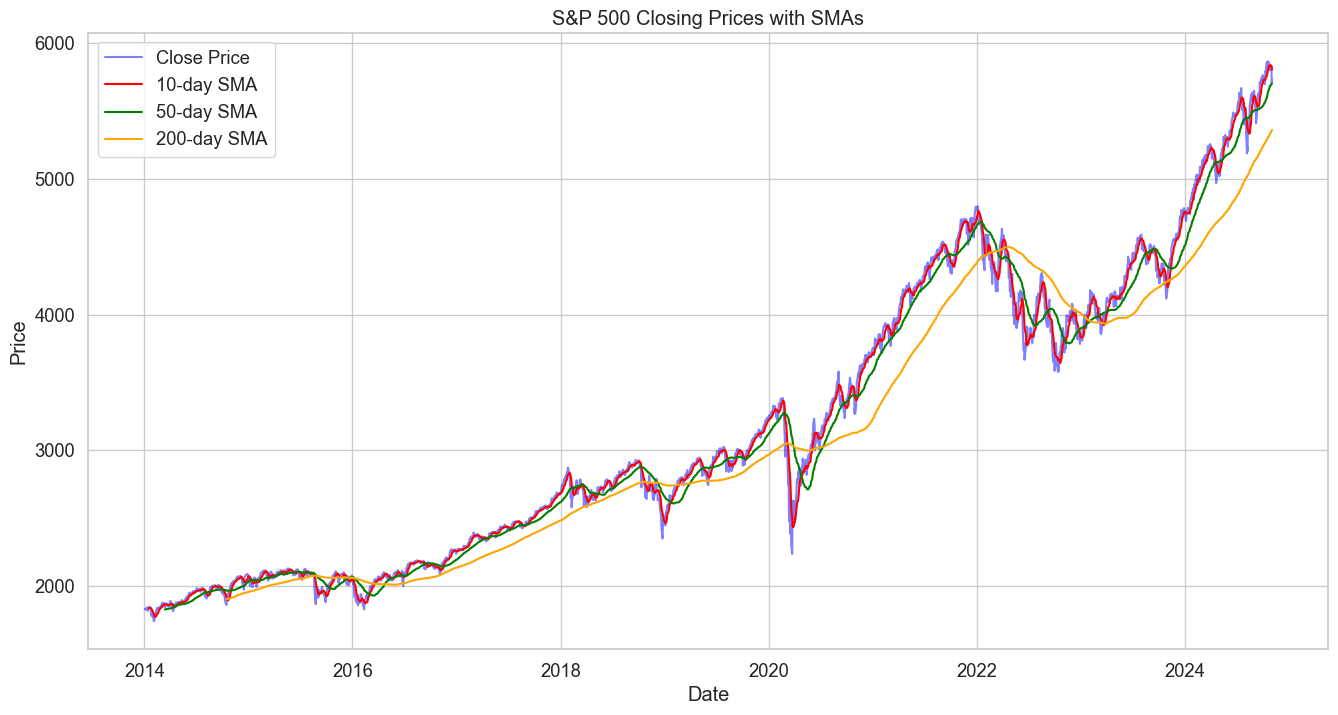

In [34]:
plt.figure(figsize=(16, 8))

# Plot the closing prices
plt.plot(recent_years.index, recent_years['Close_^GSPC'], label='Close Price', color='blue', alpha=0.5)

# Plot the SMAs
plt.plot(recent_years.index, recent_years['SMA_10'], label='10-day SMA', color='red')
plt.plot(recent_years.index, recent_years['SMA_50'], label='50-day SMA', color='green')
plt.plot(recent_years.index, recent_years['SMA_200'], label='200-day SMA', color='orange')

plt.title('S&P 500 Closing Prices with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

This chart illustrates the S&P 500 closing prices along with three key moving averages: the 10-day, 50-day, and 200-day simple moving averages (SMAs). The closing prices, represented by the blue line, show daily fluctuations and overall trends in the market over time.

1. **Short-Term Trends (10-day SMA - Red)**: The 10-day SMA closely follows the actual closing prices, capturing short-term market trends. Its close proximity to the closing price line indicates its sensitivity to recent changes, making it suitable for identifying shorter-term shifts in momentum.

2. **Intermediate-Term Trends (50-day SMA - Green)**: The 50-day SMA smooths out more of the short-term fluctuations, reflecting intermediate trends. This line is less volatile than the 10-day SMA and provides a balanced view of the market's direction over a longer period.

3. **Long-Term Trends (200-day SMA - Orange)**: The 200-day SMA represents long-term market trends, reacting slowly to changes in price. This line provides an overall indication of market health and is often used as a benchmark to distinguish between bullish and bearish market conditions. Notably, when the closing prices consistently stay above the 200-day SMA, it suggests sustained upward momentum, whereas a drop below may indicate potential downturns.

Throughout the timeline, particularly around market corrections or significant price drops (like in early 2020), the divergence between the short-term and long-term SMAs becomes apparent. The recovery phases and long-term upward trends are also reflected as the SMAs converge back to align with rising prices. This multi-timeframe analysis highlights the SMA’s utility in tracking and interpreting price momentum across different market conditions.

### 5.2 Older years

In [36]:
# Compute the 10-day SMA
oldest_years['SMA_10'] = oldest_years['Close_^GSPC'].rolling(window=10).mean()

# Compute the 50-day SMA
oldest_years['SMA_50'] = oldest_years['Close_^GSPC'].rolling(window=50).mean()

# Compute the 200-day SMA
oldest_years['SMA_200'] = oldest_years['Close_^GSPC'].rolling(window=200).mean()

C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\2770346260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldest_years['SMA_10'] = oldest_years['Close_^GSPC'].rolling(window=10).mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\2770346260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldest_years['SMA_50'] = oldest_years['Close_^GSPC'].rolling(window=50).mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\2770346260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

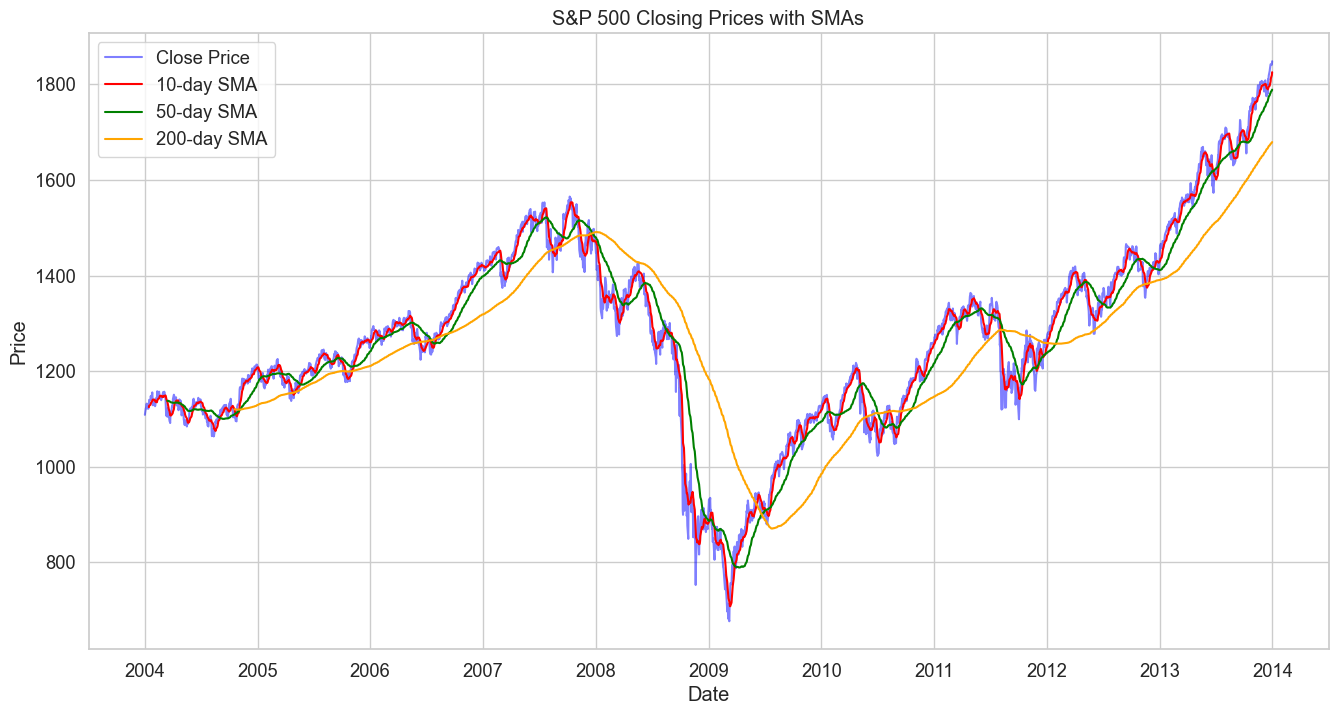

In [37]:
plt.figure(figsize=(16, 8))

# Plot the closing prices
plt.plot(oldest_years.index, oldest_years['Close_^GSPC'], label='Close Price', color='blue', alpha=0.5)

# Plot the SMAs
plt.plot(oldest_years.index, oldest_years['SMA_10'], label='10-day SMA', color='red')
plt.plot(oldest_years.index, oldest_years['SMA_50'], label='50-day SMA', color='green')
plt.plot(oldest_years.index, oldest_years['SMA_200'], label='200-day SMA', color='orange')

plt.title('S&P 500 Closing Prices with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

This chart depicts the S&P 500 closing prices from 2004 to 2014, along with the 10-day, 50-day, and 200-day simple moving averages (SMAs). 

1. **Short-Term Trends (10-day SMA - Red)**: The 10-day SMA follows the actual price movements closely, showing quick adjustments to market changes. This line reveals the immediate market sentiment, making it sensitive to daily and short-term trends.

2. **Intermediate-Term Trends (50-day SMA - Green)**: The 50-day SMA smooths out more fluctuations, revealing mid-term trends without the rapid changes seen in the 10-day SMA. This line highlights periods of sustained market movement, like the bull markets in 2006-2007 and 2012-2014.

3. **Long-Term Trends (200-day SMA - Orange)**: The 200-day SMA captures the overall long-term trend, reacting slowly to changes. It provides a general direction of the market's movement. Notable in this period is the significant decline during the 2008 financial crisis, where the closing price dips sharply below the 200-day SMA, indicating a prolonged bear market. The recovery is marked as prices move back above this long-term average from 2010 onward.

**Key Observations**:
- **2008 Financial Crisis**: The chart shows a substantial drop during the financial crisis, where the closing prices fall well below both the 50-day and 200-day SMAs, indicating a strong downtrend. 
- **Post-Crisis Recovery**: After 2009, there’s a gradual recovery where prices regain stability above the 200-day SMA, marking the beginning of a sustained uptrend that continues until 2014.
- **Bull Market**: From 2012 to 2014, the S&P 500 remains mostly above all three SMAs, reflecting a strong, consistent upward trend.

This multi-SMA approach effectively illustrates market momentum and major economic events, showing how the S&P 500 recovered from the crisis and entered a period of growth.

## 6- Moving volatilities

In this section, we delve into the analysis of moving volatilities for the S&P 500, a crucial measure of market risk and investor sentiment. Moving volatility provides a dynamic view of the market's fluctuations over time by calculating the standard deviation of returns across different time windows. This approach allows us to capture short-, medium-, and long-term volatility trends, offering insights into periods of market stability or turbulence.

By employing various rolling windows, such as 10, 50, and 200 days, we can observe how volatility behaves under different market conditions and across varying time frames. The shorter windows highlight rapid changes and daily fluctuations, whereas longer windows smooth out these fluctuations, revealing broader trends. This perspective is essential for understanding how market volatility evolves over time and how it correlates with significant economic events.

An example analysis within this section focuses on older years, utilizing historical S&P 500 data to examine how volatility patterns changed during earlier market periods. This provides a baseline for comparing volatility across different market cycles and economic environments, shedding light on the factors driving historical market movements.

### 6.1- Recent years

In [16]:
recent_years['Daily_Return'] = recent_years['Close_^GSPC'].pct_change()

# Movile Volatility with 10 days
recent_years['Volatility_10'] = recent_years['Daily_Return'].rolling(window=10).std()

# Movile Volatility with 50 days
recent_years['Volatility_50'] = recent_years['Daily_Return'].rolling(window=50).std()

# Movile Volatility with 200 days
recent_years['Volatility_200'] = recent_years['Daily_Return'].rolling(window=200).std()

C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\1466164026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_years['Daily_Return'] = recent_years['Close_^GSPC'].pct_change()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\1466164026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_years['Volatility_10'] = recent_years['Daily_Return'].rolling(window=10).std()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\1466164026.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

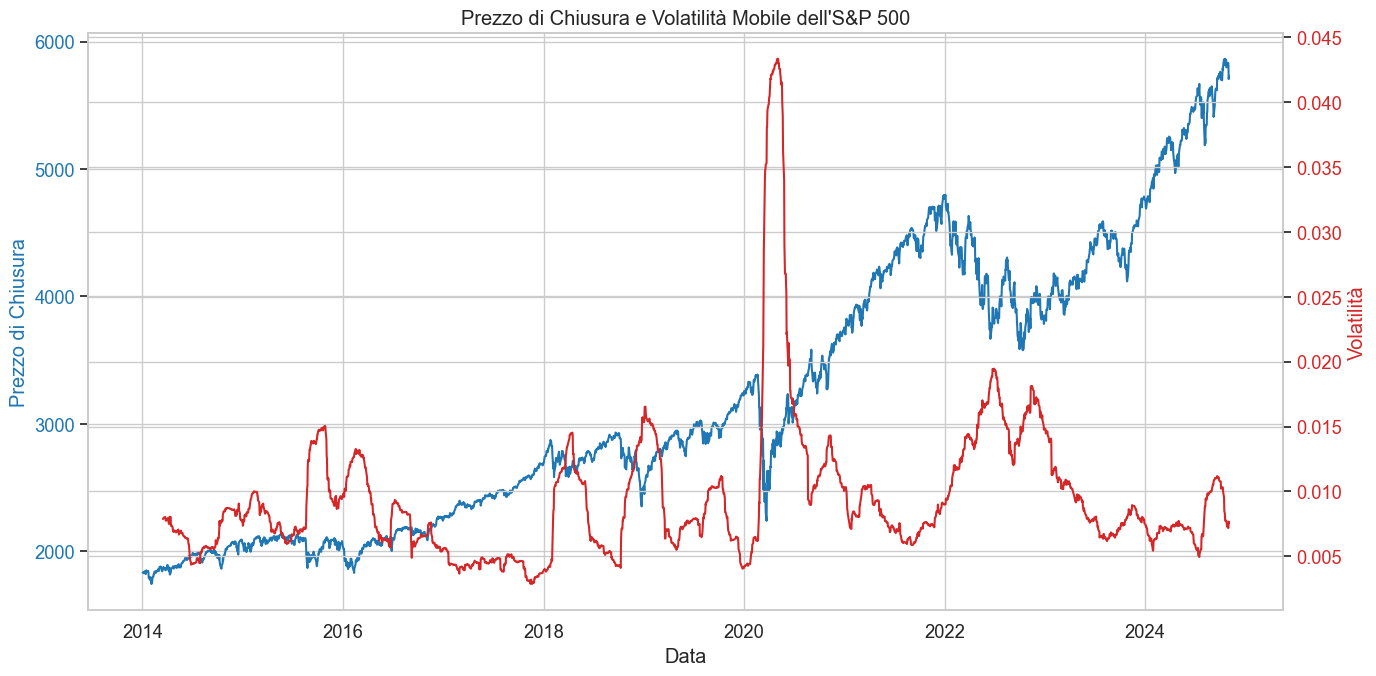

In [ ]:
# Creare una figura con due assi y condividendo lo stesso asse x
fig, ax1 = plt.subplots(figsize=(16, 8))

# Grafico dei prezzi di chiusura
color = 'tab:blue'
ax1.set_xlabel('Data')
ax1.set_ylabel('Prezzo di Chiusura', color=color)
ax1.plot(recent_years.index, recent_years['Close_^GSPC'], color=color, label='Prezzo di Chiusura')
ax1.tick_params(axis='y', labelcolor=color)

# Creare un secondo asse y che condivide lo stesso asse x
ax2 = ax1.twinx()

# Grafico della volatilità a 50 giorni
color = 'tab:red'
ax2.set_ylabel('Volatilità', color=color)
ax2.plot(recent_years.index, recent_years['Volatility_50'], color=color, label='Volatilità 50 giorni')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Prezzo di Chiusura e Volatilità Mobile dell\'S&P 500')
fig.tight_layout()
plt.show()


This chart displays the S&P 500 closing price (in blue) alongside its 50-day moving volatility (in red) over time. The left vertical axis represents the closing price, while the right vertical axis indicates volatility levels. 

From the chart, we can observe that periods of heightened volatility often coincide with or follow significant market downturns. For instance, the peak in volatility around early 2020 aligns with the COVID-19 pandemic, which triggered a substantial market decline. Similarly, other spikes in volatility reflect periods of uncertainty or negative market sentiment, which tend to destabilize the index.

The volatility appears to fluctuate in cycles, with peaks and troughs that highlight changing market conditions. When volatility decreases, it generally indicates a period of market stability, as seen in the latter part of the chart after 2021. This pattern suggests a potential correlation between market stability and lower volatility levels, while sharp increases in volatility may serve as early indicators of upcoming market corrections or shocks.

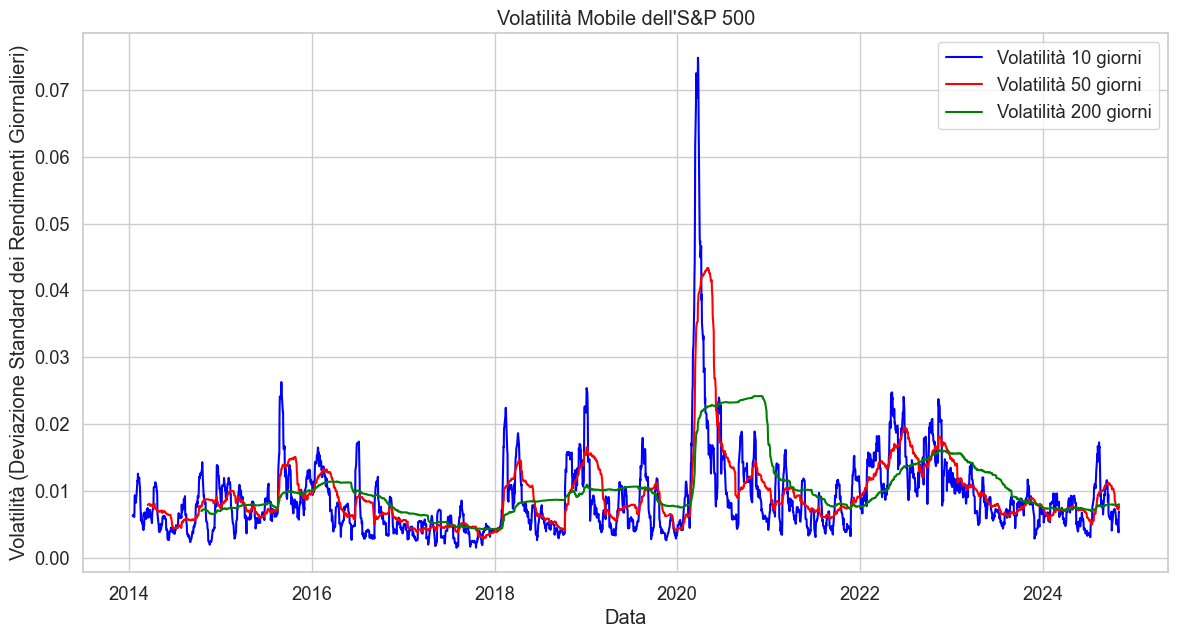

In [ ]:
plt.figure(figsize=(16, 8))

# Grafico della volatilità a 10 giorni
plt.plot(recent_years.index, recent_years['Volatility_10'], label='Volatilità 10 giorni', color='blue')

# Grafico della volatilità a 50 giorni
plt.plot(recent_years.index, recent_years['Volatility_50'], label='Volatilità 50 giorni', color='red')

# Grafico della volatilità a 200 giorni
plt.plot(recent_years.index, recent_years['Volatility_200'], label='Volatilità 200 giorni', color='green')

plt.title('Volatilità Mobile dell\'S&P 500')
plt.xlabel('Data')
plt.ylabel('Volatilità (Deviazione Standard dei Rendimenti Giornalieri)')
plt.legend()
plt.show()


This chart displays the moving volatility of the S&P 500, calculated using 10-day (blue line), 50-day (red line), and 200-day (green line) rolling windows. The y-axis represents volatility as the standard deviation of daily returns, and the x-axis represents the time period.

The 10-day volatility line, being the most responsive to recent changes, exhibits frequent and sharp fluctuations, capturing short-term volatility spikes in the market. The 50-day volatility smooths out these rapid changes but still shows responsiveness to significant market events, such as the sharp volatility increase during the COVID-19 pandemic in early 2020. The 200-day volatility line is the smoothest, reflecting long-term volatility trends and lagging behind shorter windows in response to sudden market shocks.

We can observe that during periods of market stability, all three volatility measures tend to stay low and converge. However, in times of market stress, such as early 2020, the short-term volatility (10-day) peaks sharply, followed by the 50-day, and eventually influencing the 200-day volatility over time. This staggered response highlights how each moving volatility measure captures different aspects of market risk: the 10-day for immediate sensitivity, the 50-day for medium-term risk, and the 200-day for long-term trends.

### 6.2- Older Years

In [19]:
oldest_years['Daily_Return'] = oldest_years['Close_^GSPC'].pct_change()

# Movile Volatility with 10 days
oldest_years['Volatility_10'] = oldest_years['Daily_Return'].rolling(window=10).std()

# Movile Volatility with 50 days
oldest_years['Volatility_50'] = oldest_years['Daily_Return'].rolling(window=50).std()

# Movile Volatility with 200 days
oldest_years['Volatility_200'] = oldest_years['Daily_Return'].rolling(window=200).std()

C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\2211089444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldest_years['Daily_Return'] = oldest_years['Close_^GSPC'].pct_change()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\2211089444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldest_years['Volatility_10'] = oldest_years['Daily_Return'].rolling(window=10).std()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\2211089444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

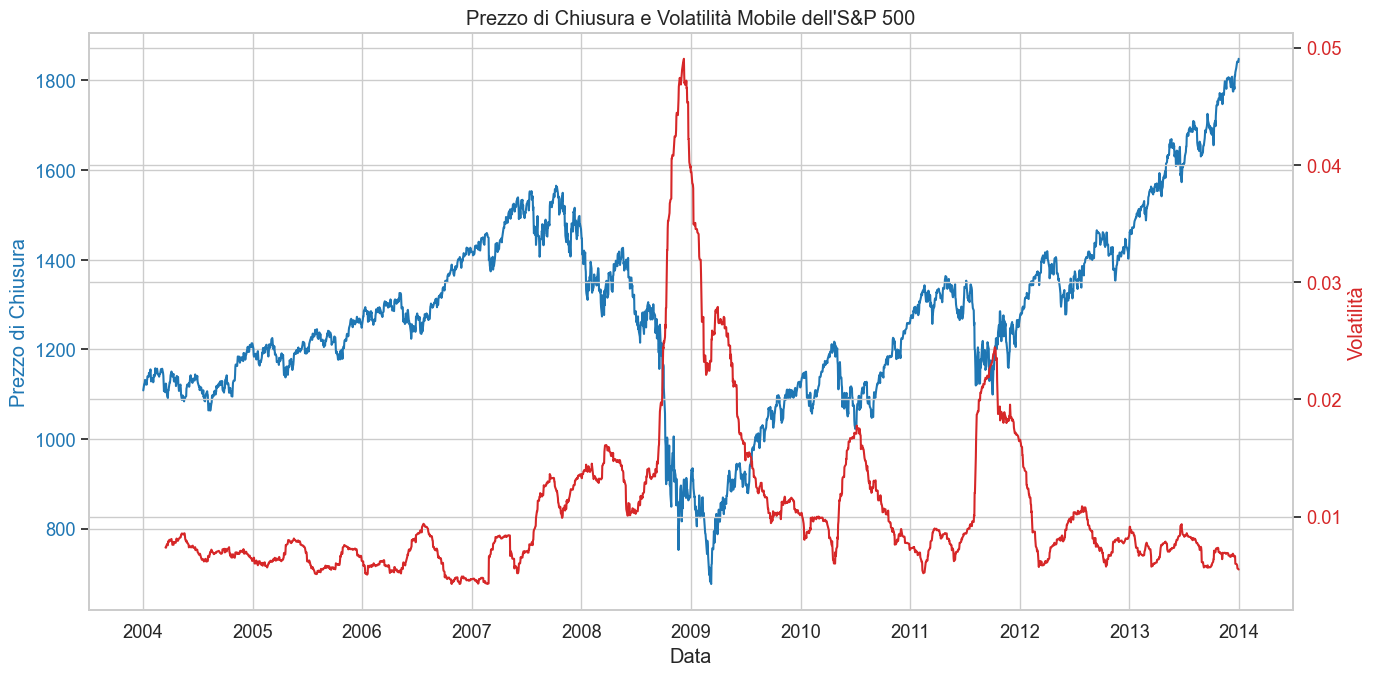

In [ ]:
# Creare una figura con due assi y condividendo lo stesso asse x
fig, ax1 = plt.subplots(figsize=(16, 8))

# Grafico dei prezzi di chiusura
color = 'tab:blue'
ax1.set_xlabel('Data')
ax1.set_ylabel('Prezzo di Chiusura', color=color)
ax1.plot(oldest_years.index, oldest_years['Close_^GSPC'], color=color, label='Prezzo di Chiusura')
ax1.tick_params(axis='y', labelcolor=color)

# Creare un secondo asse y che condivide lo stesso asse x
ax2 = ax1.twinx()

# Grafico della volatilità a 50 giorni
color = 'tab:red'
ax2.set_ylabel('Volatilità', color=color)
ax2.plot(oldest_years.index, oldest_years['Volatility_50'], color=color, label='Volatilità 50 giorni')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Prezzo di Chiusura e Volatilità Mobile dell\'S&P 500')
fig.tight_layout()
plt.show()


This chart shows the S&P 500 closing prices (blue line, left y-axis) alongside the 50-day moving volatility (red line, right y-axis) over time. 

Key observations include:
- A significant spike in volatility occurs during the 2008-2009 financial crisis. This surge reflects increased uncertainty and market turbulence, coinciding with a sharp drop in the S&P 500 price.
- After the crisis, the volatility gradually decreases, and the S&P 500 resumes an upward trend, showing that stability returned to the market.
- Smaller volatility peaks appear in 2011, aligned with periods of market stress but less severe than the 2008-2009 period.
- Over the remaining years, the S&P 500 shows consistent growth with relatively low and stable volatility, indicating a calm market environment.

This visualization highlights how volatility often increases during market downturns, providing insight into the inverse relationship between market stability and volatility.

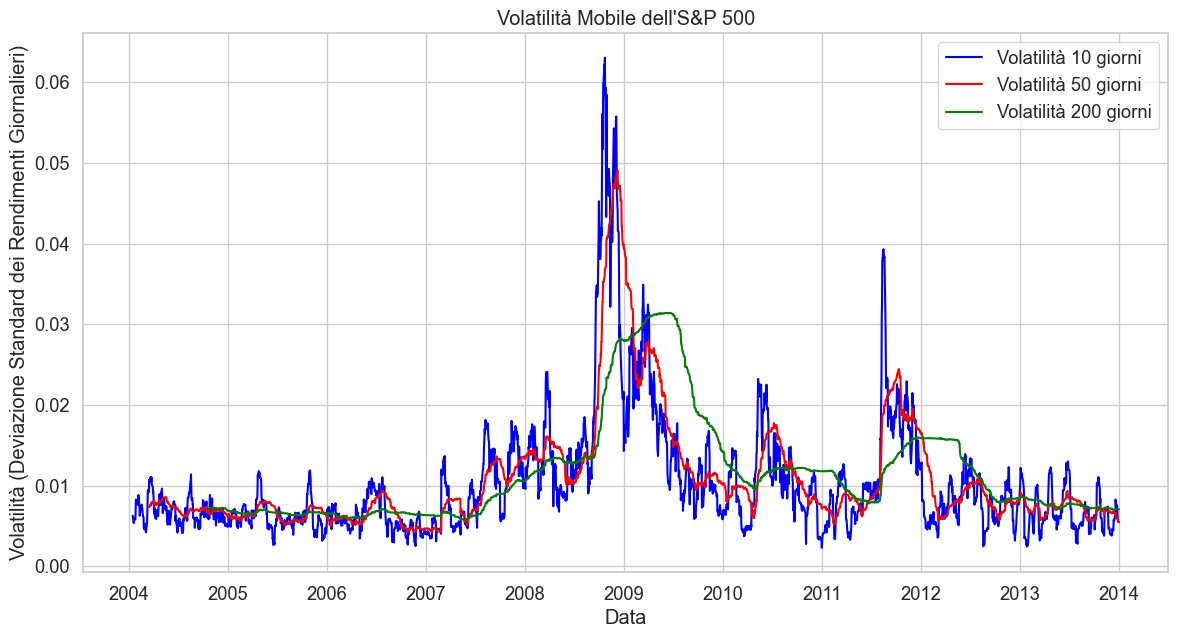

In [ ]:
plt.figure(figsize=(16, 8))

# Grafico della volatilità a 10 giorni
plt.plot(oldest_years.index, oldest_years['Volatility_10'], label='Volatilità 10 giorni', color='blue')

# Grafico della volatilità a 50 giorni
plt.plot(oldest_years.index, oldest_years['Volatility_50'], label='Volatilità 50 giorni', color='red')

# Grafico della volatilità a 200 giorni
plt.plot(oldest_years.index, oldest_years['Volatility_200'], label='Volatilità 200 giorni', color='green')

plt.title('Volatilità Mobile dell\'S&P 500')
plt.xlabel('Data')
plt.ylabel('Volatilità (Deviazione Standard dei Rendimenti Giornalieri)')
plt.legend()
plt.show()

This chart shows the moving volatility of the S&P 500 over time, represented by the standard deviation of daily returns calculated over three different rolling windows: 10 days (blue line), 50 days (red line), and 200 days (green line).

Key observations include:
- The 10-day volatility (blue line) is the most responsive to short-term fluctuations, exhibiting sharp spikes, particularly noticeable during periods of high market stress, such as the 2008 financial crisis.
- The 50-day volatility (red line) smooths out some of these short-term fluctuations but still reflects significant volatility events, although with less intensity than the 10-day measure.
- The 200-day volatility (green line) provides a much smoother view, capturing long-term trends in market volatility. It rises more gradually during prolonged periods of market stress, such as the 2008 crisis, and declines more steadily after these periods.
- The pronounced spike around 2008 reflects the extreme market instability during the financial crisis, after which volatility trends gradually decrease and stabilize.

This visualization highlights the value of different rolling windows in understanding market volatility: shorter windows capture rapid changes, while longer windows provide a more stable view of sustained volatility trends.

## 7- Bollinger bands

In this section, we explore Bollinger Bands, a widely used technical analysis tool that combines price trends with volatility to identify potential overbought or oversold conditions in the market. Bollinger Bands consist of a moving average (typically the 20-day Simple Moving Average) surrounded by two bands—an upper and a lower band—set at a specified number of standard deviations from the moving average, often two. 

The bands expand and contract based on market volatility: they widen during periods of high volatility and narrow during calmer periods. By analyzing Bollinger Bands, we can gain insights into price fluctuations and potential reversal points. For example, when the price nears or crosses the upper band, it may indicate an overbought condition, while proximity to the lower band could suggest an oversold condition. This analysis helps in assessing short-term market trends and identifying entry or exit points.

The subsection on recent years implements these bands to provide a contemporary perspective on S&P 500 price movements, showing how Bollinger Bands react to recent market volatility and trends.

### 7.1- Recent Years

In [38]:
# Calcola la SMA a 20 giorni
recent_years['SMA_20'] = recent_years['Close_^GSPC'].rolling(window=20).mean()

# Calcola la deviazione standard mobile a 20 giorni
recent_years['Volatility_20'] = recent_years['Close_^GSPC'].rolling(window=20).std()

# Calcola le Bande di Bollinger superiore e inferiore
recent_years['Upper_Band'] = recent_years['SMA_20'] + (recent_years['Volatility_20'] * 2)
recent_years['Lower_Band'] = recent_years['SMA_20'] - (recent_years['Volatility_20'] * 2)

C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\369322289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_years['SMA_20'] = recent_years['Close_^GSPC'].rolling(window=20).mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\369322289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_years['Volatility_20'] = recent_years['Close_^GSPC'].rolling(window=20).std()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\369322289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

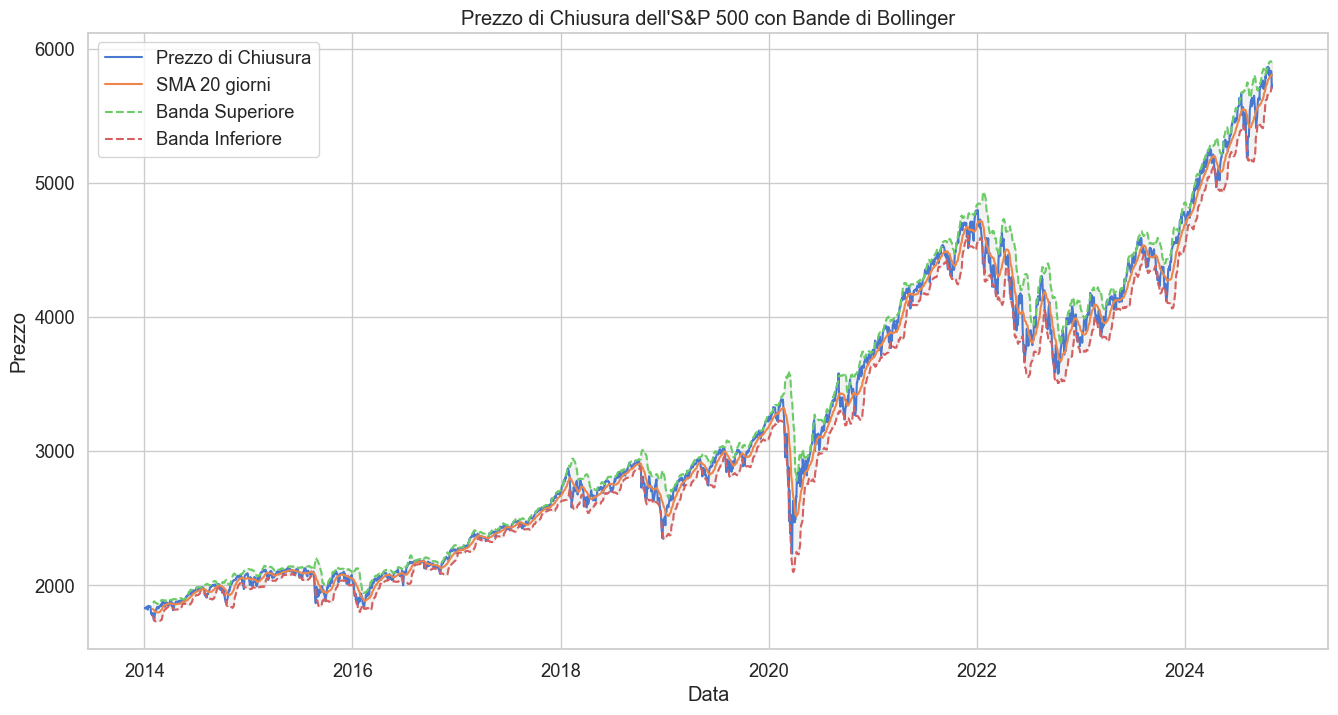

In [39]:
# Traccia le Bande di Bollinger con i prezzi di chiusura
#recent_data = recent_years.loc[recent_years.index >= (recent_years.index.max() - pd.DateOffset(years=1))]

plt.figure(figsize=(16, 8))
plt.plot(recent_years.index, recent_years['Close_^GSPC'], label='Prezzo di Chiusura')
plt.plot(recent_years.index, recent_years['SMA_20'], label='SMA 20 giorni')
plt.plot(recent_years.index, recent_years['Upper_Band'], label='Banda Superiore', linestyle='--')
plt.plot(recent_years.index, recent_years['Lower_Band'], label='Banda Inferiore', linestyle='--')
plt.fill_between(recent_years.index, recent_years['Lower_Band'], recent_years['Upper_Band'], color='gray', alpha=0.1)
plt.title('Prezzo di Chiusura dell\'S&P 500 con Bande di Bollinger')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.show()

This chart displays the S&P 500 closing prices alongside Bollinger Bands, which include the 20-day Simple Moving Average (SMA) as well as the upper and lower bands set at two standard deviations from the SMA. 

In this visualization:
- The blue line represents the closing price of the S&P 500, which shows a general upward trend over the years.
- The orange line is the 20-day SMA, smoothing out daily price fluctuations and providing a clearer view of the underlying trend.
- The green and red dashed lines are the upper and lower Bollinger Bands, respectively. These bands expand during periods of high volatility (such as early 2020) and contract during stable periods, following the principle that market volatility impacts the distance of the bands from the SMA.

Significantly, the price frequently oscillates between the bands, touching or breaching them during periods of potential overbought or oversold conditions. For instance, during the COVID-19 market crash in early 2020, we see a substantial widening of the bands, reflecting increased volatility, and the price breaches the lower band, indicating a potential oversold signal. This chart highlights how Bollinger Bands can provide insight into price extremes and market sentiment shifts based on volatility.

### 7.2-Older years

In [23]:
# Calcola la SMA a 20 giorni
oldest_years['SMA_20'] = oldest_years['Close_^GSPC'].rolling(window=20).mean()

# Calcola la deviazione standard mobile a 20 giorni
oldest_years['Volatility_20'] = oldest_years['Close_^GSPC'].rolling(window=20).std()

# Calcola le Bande di Bollinger superiore e inferiore
oldest_years['Upper_Band'] = oldest_years['SMA_20'] + (oldest_years['Volatility_20'] * 2)
oldest_years['Lower_Band'] = oldest_years['SMA_20'] - (oldest_years['Volatility_20'] * 2)

C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\3256945100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldest_years['SMA_20'] = oldest_years['Close_^GSPC'].rolling(window=20).mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\3256945100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldest_years['Volatility_20'] = oldest_years['Close_^GSPC'].rolling(window=20).std()
C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\3256945100.py:8: SettingWithCopyWarning: 
A value is trying to be set on

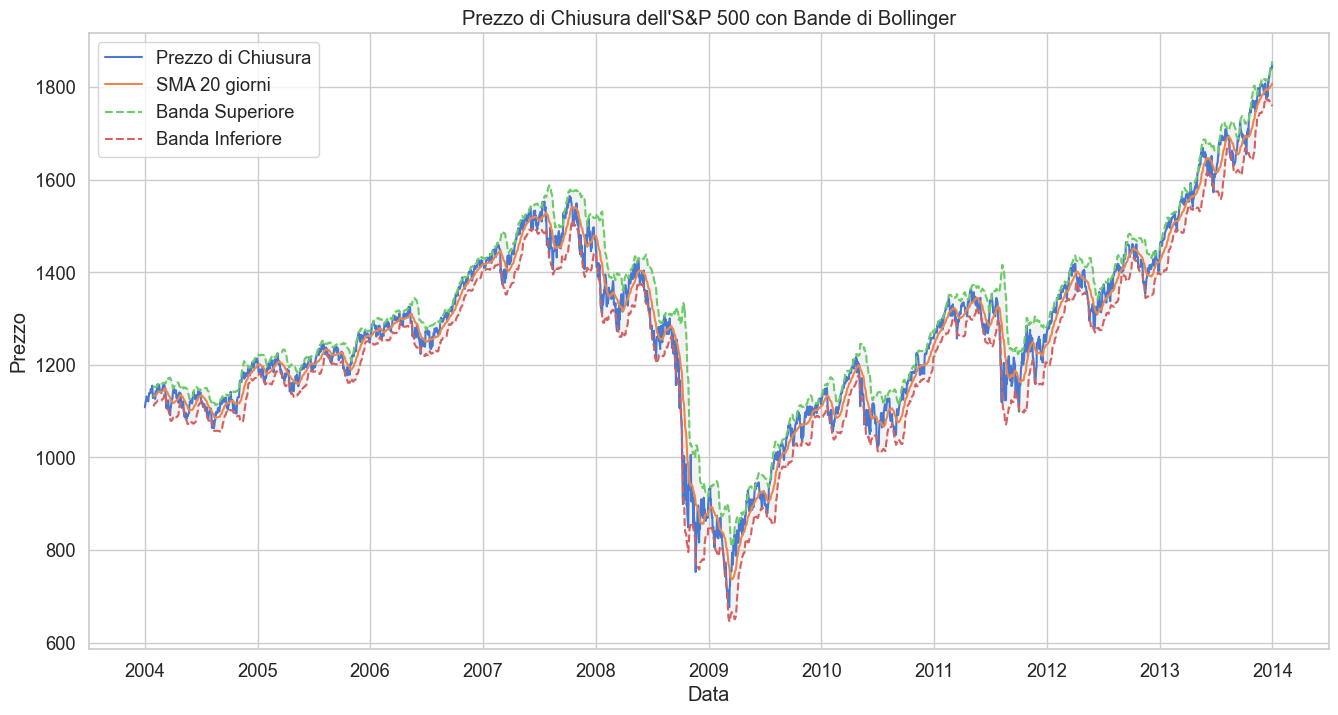

In [24]:
# Traccia le Bande di Bollinger con i prezzi di chiusura
#recent_data = oldest_years.loc[oldest_years.index >= (oldest_years.index.max() - pd.DateOffset(years=1))]

plt.figure(figsize=(16, 8))
plt.plot(oldest_years.index, oldest_years['Close_^GSPC'], label='Prezzo di Chiusura')
plt.plot(oldest_years.index, oldest_years['SMA_20'], label='SMA 20 giorni')
plt.plot(oldest_years.index, oldest_years['Upper_Band'], label='Banda Superiore', linestyle='--')
plt.plot(oldest_years.index, oldest_years['Lower_Band'], label='Banda Inferiore', linestyle='--')
plt.fill_between(oldest_years.index, oldest_years['Lower_Band'], oldest_years['Upper_Band'], color='gray', alpha=0.1)
plt.title('Prezzo di Chiusura dell\'S&P 500 con Bande di Bollinger')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.show()

This chart shows the S&P 500 closing prices with Bollinger Bands applied over the period from 2004 to 2014. Here’s a breakdown of the components:

- **Blue Line**: Represents the closing price of the S&P 500, illustrating the market's overall trend over the years.
- **Orange Line**: The 20-day Simple Moving Average (SMA), which smooths out price fluctuations and provides a baseline trend.
- **Green Dashed Line (Upper Band)** and **Red Dashed Line (Lower Band)**: These represent the Bollinger Bands, set at two standard deviations from the 20-day SMA. They expand and contract based on the level of market volatility.

During this period, we observe several instances where the price approaches or crosses the upper or lower bands:
- **2008-2009 Financial Crisis**: The volatility significantly increases, leading to a marked expansion of the bands. The price repeatedly touches or breaches the lower band, indicating a highly volatile and oversold market condition.
- **Post-2009 Recovery**: The price gradually trends upward, with occasional touches to the upper band, signaling periods of potential overbought conditions during the steady bull market.

Overall, the Bollinger Bands effectively capture the periods of high and low volatility, with significant expansions around major market events and contractions during stable periods. This tool helps illustrate the dynamics of price movement and volatility, providing insights into potential buying or selling conditions based on price extremes.

## 8- Autocorrelation on Percentage Change

In this section, we analyze the autocorrelation of daily percentage changes in the S&P 500, exploring the relationship between returns over various time lags. Autocorrelation measures the degree of similarity between a time series and a lagged version of itself, offering insights into the persistence or randomness of returns.

By examining the autocorrelation of percentage changes, we aim to identify any patterns or dependencies over short-term intervals, which can suggest whether past price movements influence future ones. This analysis is essential in assessing the presence of any potential trend-following behavior, mean reversion, or purely random walk characteristics in the data. 

### 8.1- Recent Years

In [26]:
# Calculate the daily percentage change
recent_years['Pct_Change'] = recent_years['Close_^GSPC'].pct_change()

pct_change_df = recent_years[['Pct_Change']].copy()

# Drop NaN values resulted from pct_change
pct_change_df.dropna(inplace=True)

C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\1039925165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_years['Pct_Change'] = recent_years['Close_^GSPC'].pct_change()


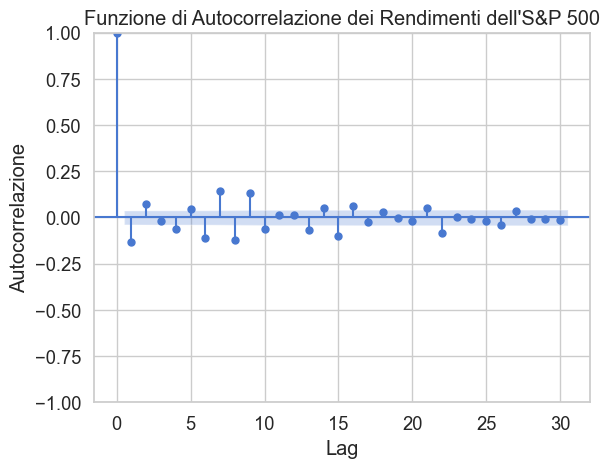

In [27]:
# Plot dell'autocorrelazione
plot_acf(pct_change_df['Pct_Change'], lags=30)
plt.title('Funzione di Autocorrelazione dei Rendimenti dell\'S&P 500')
plt.xlabel('Lag')
plt.ylabel('Autocorrelazione')
plt.show()

This autocorrelation plot of the S&P 500 daily returns over a 30-day lag range shows how each lagged return correlates with the current day’s return. The most notable observation is the large spike at lag 0, which represents the autocorrelation of each return with itself and is always equal to 1, indicating a perfect correlation.

Beyond lag 0, the autocorrelation values hover around zero, with minor fluctuations both above and below the axis. These small oscillations suggest that there is little to no significant autocorrelation in daily returns over short lags, implying that the returns do not exhibit a strong pattern or persistence and are closer to a random walk.

In the context of time series analysis, this lack of significant autocorrelation at non-zero lags supports the hypothesis of weak-form market efficiency, where past returns do not provide much predictive power for future returns. Therefore, price changes appear to be largely independent over time, as evidenced by the low autocorrelation values across all non-zero lags.

### 8.2- Older years

In [28]:
# Calculate the daily percentage change
oldest_years['Pct_Change'] = oldest_years['Close_^GSPC'].pct_change()

old_pct_change_df = oldest_years[['Pct_Change']].copy()

# Drop NaN values resulted from pct_change
old_pct_change_df.dropna(inplace=True)

C:\Users\ricca\AppData\Local\Temp\ipykernel_27612\773826429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldest_years['Pct_Change'] = oldest_years['Close_^GSPC'].pct_change()


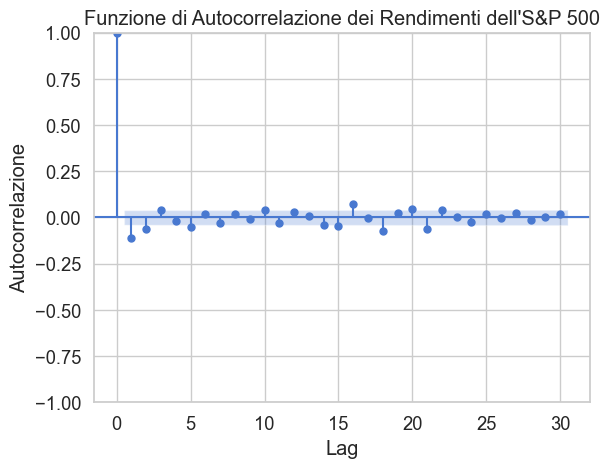

In [29]:
# Plot dell'autocorrelazione
plot_acf(old_pct_change_df['Pct_Change'], lags=30)
plt.title('Funzione di Autocorrelazione dei Rendimenti dell\'S&P 500')
plt.xlabel('Lag')
plt.ylabel('Autocorrelazione')
plt.show()

This autocorrelation plot of the S&P 500 daily returns for older data (2004-2013) shows a similar pattern to the previous one, where autocorrelation values quickly drop off after lag 0. The spike at lag 0, with an autocorrelation of 1, represents the correlation of each return with itself, which is always perfect.

Beyond lag 0, the autocorrelation values fluctuate closely around zero, indicating little to no significant autocorrelation in daily returns over short lags. This suggests that, during the period from 2004 to 2013, the returns also exhibit characteristics of a random walk, with minimal persistence or predictable patterns in day-to-day price changes.

The absence of strong autocorrelation at non-zero lags implies that past returns did not have substantial predictive power for future returns during this period. This supports the idea of weak-form market efficiency, where price changes are largely independent of past information. Therefore, just like in recent years, the market behavior in this period aligns with a random walk hypothesis, reflecting an efficient market with respect to historical price data.

## 9- Cointegration Test (Augmented Dickey-Fuller Test)

In this section, we perform the Augmented Dickey-Fuller (ADF) test to evaluate the stationarity of the S&P 500 percentage returns over two distinct time periods: recent years and older years. The ADF test is a statistical method used to determine whether a time series has a unit root, implying non-stationarity. Stationarity is a crucial property in time series analysis, as it indicates that the statistical properties (mean, variance) of a series remain constant over time. If the returns are stationary, they do not follow a random walk, suggesting potential predictability or mean reversion. We conduct the ADF test on both recent and older data to observe any differences in the stationarity characteristics of S&P 500 returns across these periods.

### 9.1- Recent years

In [ ]:
result = adfuller(pct_change_df['Pct_Change'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value:.3f}')

ADF Statistic: -11.100650
p-value: 0.000000
Critical Values:
   1%: -3.433
   5%: -2.863
   10%: -2.567


The ADF test results for recent years show an ADF statistic of -11.100650 with a p-value of 0.000000. The p-value is significantly lower than conventional significance levels (1%, 5%, and 10%), and the ADF statistic is more negative than all the critical values (1%: -3.433, 5%: -2.863, and 10%: -2.567). These results strongly reject the null hypothesis of a unit root, indicating that the percentage returns for recent years are stationary. This implies that the return series does not exhibit a random walk, and there may be some level of mean reversion or predictability in recent S&P 500 returns.

### 9.2- Older years

In [32]:
old_result = adfuller(old_pct_change_df['Pct_Change'])
print('ADF Statistic: %f' % old_result[0])
print('p-value: %f' % old_result[1])
print('Critical Values:')
for key, value in old_result[4].items():
    print(f'   {key}: {value:.3f}')

ADF Statistic: -10.991100
p-value: 0.000000
Critical Values:
   1%: -3.433
   5%: -2.863
   10%: -2.567


For the older years, the ADF test yields an ADF statistic of -10.991100 and a p-value of 0.000000. Similar to the recent years, the p-value is far below typical significance levels, and the ADF statistic is also more negative than the critical values. Thus, the null hypothesis of non-stationarity is strongly rejected, indicating that the S&P 500 percentage returns in older years are also stationary. This suggests that, like recent years, returns during this period did not follow a pure random walk, implying some consistency in the mean-reverting or predictable nature of S&P 500 returns over time.

## 10- Test for Random Walk by Applying Regression Model

In this section, we perform a test for the presence of a random walk in the S&P 500 time series by applying a regression model. The random walk hypothesis suggests that asset prices follow a stochastic process, where future prices are independent of past prices, making them unpredictable. This characteristic of a random walk implies non-stationarity and is often associated with market efficiency, where price changes are driven purely by new information.

To test this hypothesis, we apply a regression model to the percentage returns of the S&P 500 over two distinct periods: recent years and older years. By comparing the results, we aim to observe if there are any differences in the behavior of returns over time and whether the random walk hypothesis holds for both periods. If the results indicate predictability, this could suggest deviations from the random walk model, hinting at patterns or structures in the return series.

### 10.1- Recent yers

In [30]:
# Create lagged percentage change
pct_change_df['Pct_Change_Lag1'] = pct_change_df['Pct_Change'].shift(1)

# Drop NaN values
pct_change_df.dropna(inplace=True)

# Define the independent and dependent variables
X = pct_change_df['Pct_Change_Lag1']
y = pct_change_df['Pct_Change']

# Add a constant term
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Pct_Change   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     50.87
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.26e-12
Time:                        23:47:58   Log-Likelihood:                 8462.9
No. Observations:                2726   AIC:                        -1.692e+04
Df Residuals:                    2724   BIC:                        -1.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0005      0.000     

The results of the OLS regression for testing the random walk hypothesis show the following:

1. **Coefficient for Lagged Percentage Change (`Pct_Change_Lag1`)**: The coefficient of -0.1354 is statistically significant with a very low p-value (0.000), indicating that there is a small, but significant, negative relationship between the lagged percentage change and the current percentage change. This suggests a slight mean-reverting tendency in the S&P 500 returns, as a negative coefficient implies that a positive return in the previous period is slightly more likely to be followed by a negative return, and vice versa.

2. **R-squared**: The R-squared value is extremely low (0.018), which means that the lagged percentage change explains only 1.8% of the variability in the current percentage change. This low R-squared value is consistent with the random walk hypothesis, as it implies that most of the current return is not explained by past returns, supporting the idea that returns are largely independent.

3. **Intercept (Constant)**: The constant term is very small (0.0005) but statistically significant. While significant, this small intercept value has minimal impact on the overall result.

4. **F-statistic**: The F-statistic (50.87) and its associated p-value (1.26e-12) suggest that the model overall is statistically significant. However, the practical significance is minimal given the low R-squared.

In summary, while there is a statistically significant negative relationship between lagged and current returns, the relationship is very weak. The low R-squared value supports the notion that the S&P 500 price movements are mostly independent and unpredictable, which is consistent with the random walk hypothesis.

### 10.2- Older years

In [33]:
# Create lagged percentage change
old_pct_change_df['Pct_Change_Lag1'] = old_pct_change_df['Pct_Change'].shift(1)

# Drop NaN values
old_pct_change_df.dropna(inplace=True)

# Define the independent and dependent variables
old_X = old_pct_change_df['Pct_Change_Lag1']
old_y = old_pct_change_df['Pct_Change']

# Add a constant term
old_X = sm.add_constant(old_X)

# Fit the regression model
old_model = sm.OLS(old_y, old_X).fit()

# Display the summary
print(old_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Pct_Change   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     32.32
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           1.46e-08
Time:                        09:16:30   Log-Likelihood:                 7396.8
No. Observations:                2515   AIC:                        -1.479e+04
Df Residuals:                    2513   BIC:                        -1.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003      0.000     

The results of the OLS regression for testing the random walk hypothesis on older data (2004-2013) reveal the following:

1. **Coefficient for Lagged Percentage Change (`Pct_Change_Lag1`)**: The coefficient is -0.1127, which is statistically significant with a p-value of 0.000. This negative coefficient indicates a slight mean-reversion tendency, similar to the recent years' data, meaning that a positive return in the previous period may be followed by a negative return, and vice versa. However, the effect remains weak.

2. **R-squared**: The R-squared value is very low (0.013), which suggests that only 1.3% of the variability in the current percentage change is explained by the lagged percentage change. This supports the random walk hypothesis, as it indicates that most of the current return is not dependent on past returns, suggesting independence in price movements.

3. **Intercept (Constant)**: The constant term is close to zero (0.0003) and statistically insignificant (p-value of 0.219). This implies no meaningful impact from the intercept on the model's predictions.

4. **F-statistic**: The F-statistic (32.32) and the associated p-value (1.46e-08) show that the model is statistically significant. However, given the low R-squared, the practical significance is minimal.

In summary, the results indicate a very weak but statistically significant relationship between lagged and current returns, consistent with the random walk hypothesis. The low R-squared value further suggests that S&P 500 returns during this period are mostly independent and do not follow a predictable pattern based on past returns. This aligns with the notion that stock prices largely exhibit random walk behavior over this historical period as well.